#Introduction


##TEAM BITWISE BRAINS
**CSE445**

**Sec: 08**

**Project:Phase 04**

**Name: Samiul Basir Bhuiyan      ID:2111006642**

**Name: Mohammed Aman Bhuiyan     ID:2131864642**

**Name: Md Sazzad Hossain Adib    ID:2132025642**


In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [421]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')
df.head()

<ipython-input-421-229f29f826be>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


EcYear EcNumber        CallTime  \
0   2020    31486  12/31/20 22:41   
1   2020    31485  12/31/20 22:25   
2   2020    31483  12/31/20 21:54   
3   2020    31482  12/31/20 21:24   
4   2020    31479  12/31/20 21:03   

                                       EmergencyArea TotalPatientsInEmergency  \
0                      NEAR APS SCHOOL FORT ROAD RWP                        1   
1  Infront of Daig.com, Near Dha gate 2,  gt road...                        1   
2  Muhammadi chowk arshad bakery khyaban e sirsye...                        1   
3  Gulzar e quaid, T/W Katcheri Near Attock Pump,...                        1   
4  Taaj Company Gawalmandi Chowk Liaqat Baag Road...                        1   

  Gender   Age HospitalName                             Reason  responsetime  \
0   Male  27.0          BBH                          Bike Slip          10.0   
1   Male  20.0          NaN                   Car hit Footpath          12.0   
2   Male  48.0          BBH              Rickshaw hit with Car          10.0   
3   Male  45.0          NaN            Car hit Car and runaway           5.0   
4   Male  22.0          NaN  Unknown Bike hit Bike and runaway           5.0   

   ... BikesInvolved BusesInvolved CarsInvolved CartInvovled  \
0  ...           1.0           0.0          0.0          0.0   
1  ...           0.0           0.0          1.0          0.0   
2  ...           0.0           0.0          1.0          0.0   
3  ...           0.0           0.0          2.0          0.0   
4  ...           2.0           0.0          0.0          0.0   

   RickshawsInvolved  TractorInvovled  TrainsInvovled  TrucksInvolved  \
0                0.0              0.0             0.0             0.0   
1                0.0              0.0             0.0             0.0   
2                1.0              0.0             0.0             0.0   
3                0.0              0.0             0.0             0.0   
4                0.0              0.0             0.0             0.0   

   VansInvolved  OthersInvolved  
0           0.0             0.0  
1           0.0             0.0  
2           0.0             0.0  
3           0.0             0.0  
4           0.0             0.0  

[5 rows x 25 columns]

In [422]:
df.shape

(46189, 25)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EcYear                    46189 non-null  object 
 1   EcNumber                  38978 non-null  object 
 2   CallTime                  40233 non-null  object 
 3   EmergencyArea             46189 non-null  object 
 4   TotalPatientsInEmergency  46189 non-null  object 
 5   Gender                    46188 non-null  object 
 6   Age                       46188 non-null  float64
 7   HospitalName              24239 non-null  object 
 8   Reason                    46188 non-null  object 
 9   responsetime              46184 non-null  float64
 10  EducationTitle            46188 non-null  object 
 11  InjuryType                46187 non-null  object 
 12  Cause                     46187 non-null  object 
 13  PatientStatus             46187 non-null  object 
 14  Bicycl

In [424]:
df.isnull().sum()

EcYear                          0
EcNumber                     7211
CallTime                     5956
EmergencyArea                   0
TotalPatientsInEmergency        0
Gender                          1
Age                             1
HospitalName                21950
Reason                          1
responsetime                    5
EducationTitle                  1
InjuryType                      2
Cause                           2
PatientStatus                   2
BicycleInvovled                 2
BikesInvolved                   2
BusesInvolved                   2
CarsInvolved                    2
CartInvovled                    2
RickshawsInvolved               2
TractorInvovled                 2
TrainsInvovled                  2
TrucksInvolved                  2
VansInvolved                    2
OthersInvolved                  2
dtype: int64

**Visualize the percentage of missing values for each column**

<ipython-input-425-8167fea06a43>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')


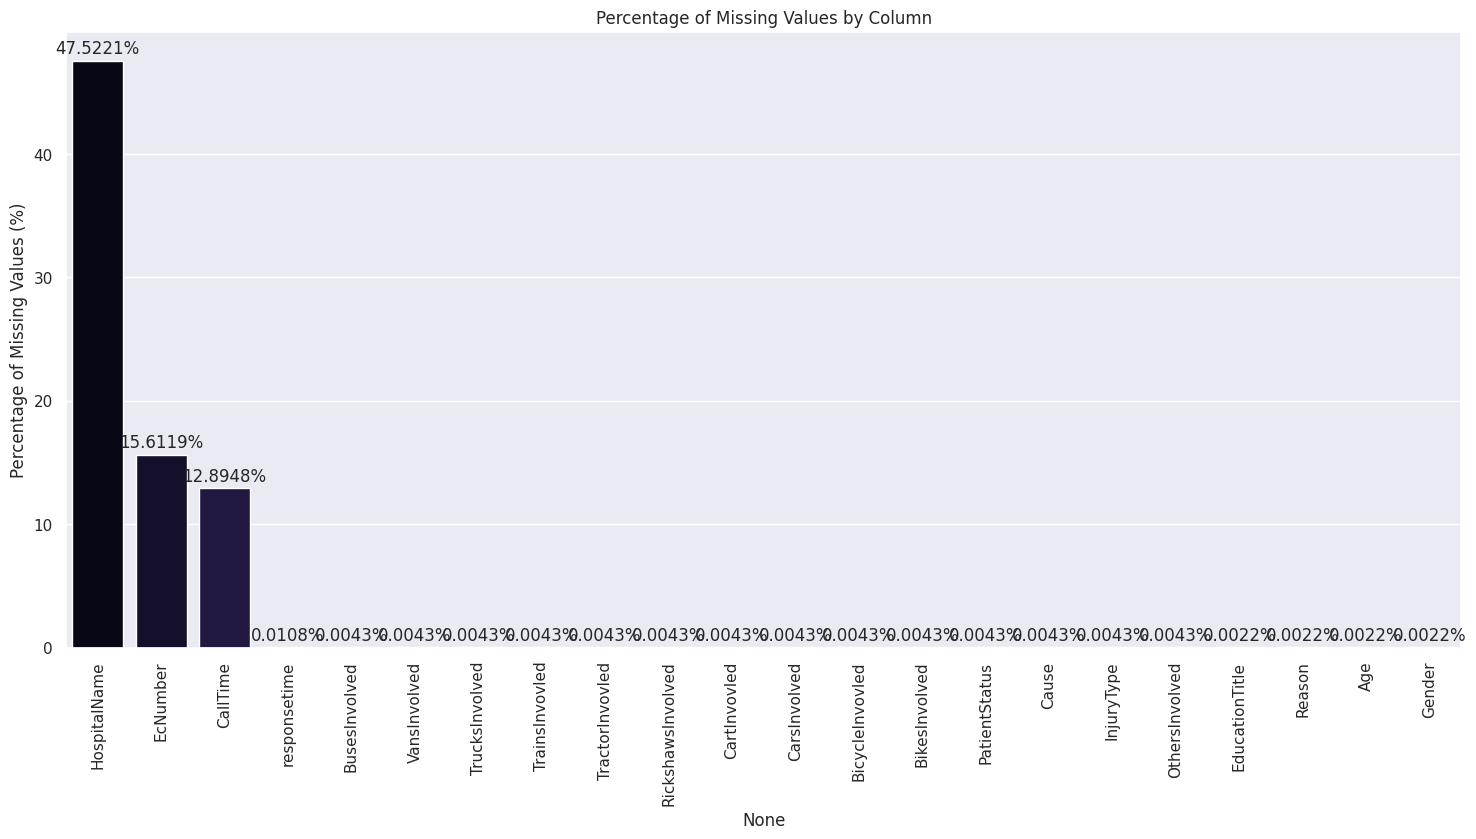

In [425]:
df_null_percentage = (df.isnull().sum() / len(df)) * 100
df_null_percentage = df_null_percentage[df_null_percentage > 0].sort_values(ascending=False)


plt.figure(figsize=(18, 8))
ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage of Missing Values (%)')

# Adding data labels with more decimal precision
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.annotate(f'{height:.4f}%',  # Use 4 decimal places
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

plt.show()


#Check Correlation

**Checking correlation between 'CallTime' and 'InjuryType' which show less dependancy between them.**

<ipython-input-426-7f413c7a2463>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
<ipython-input-426-7f413c7a2463>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
<ipython-input-426-7f413c7a2463>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

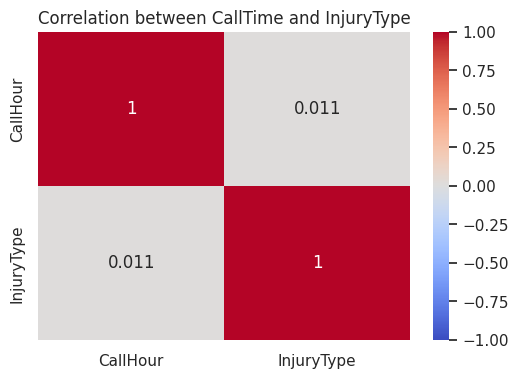

In [426]:
df_CallTime = df[['CallTime', 'InjuryType']]

# Preprocessing CallTime (convert to datetime and extract hour for correlation)
df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
df_CallTime['CallHour'] = df_CallTime['CallTime'].dt.hour  # Extract hour

# Encoding InjuryType as a numerical value
df_CallTime['InjuryType'] = df_CallTime['InjuryType'].astype('category').cat.codes

# Handle missing values (if necessary)
df_CallTime.dropna(inplace=True)

# Calculate correlation between CallHour and InjuryType
correlation = df_CallTime[['CallHour', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between CallTime and InjuryType')
plt.show()

**Checking correlation between 'EcYear' and 'InjuryType' which show less dependancy between them.**

<ipython-input-427-c202b63a4360>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EcYear['EcYear'] = df_EcYear['EcYear'].astype('category').cat.codes
<ipython-input-427-c202b63a4360>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EcYear['InjuryType'] = df_EcYear['InjuryType'].astype('category').cat.codes
<ipython-input-427-c202b63a4360>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

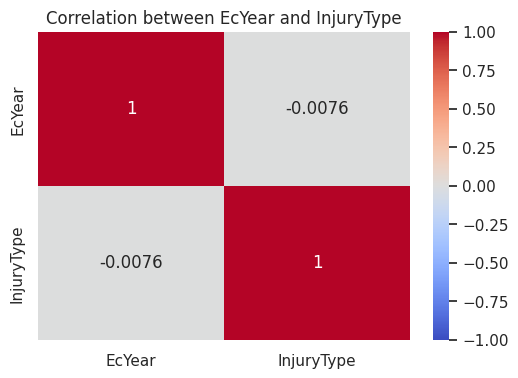

In [427]:
df_EcYear = df[['EcYear', 'InjuryType']]

# Encoding EcYear as a numerical value (2022 -> 0, 2023 -> 1, 2024 -> 2)
df_EcYear['EcYear'] = df_EcYear['EcYear'].astype('category').cat.codes

# Encoding InjuryType as a numerical value
df_EcYear['InjuryType'] = df_EcYear['InjuryType'].astype('category').cat.codes

# Handle missing values (if necessary)
df_EcYear.dropna(inplace=True)

# Calculate correlation between EcYear and InjuryType
correlation = df_EcYear[['EcYear', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcYear and InjuryType')
plt.show()

# Data Cleaning

**Dropped 'HospitalName','EcNumber','CallTime','EcYear'**

1. Drop the HospitalName & EcNumber coloumn as it is less important and have huge NULL values
2. By analysing the dataset the values of EcYear & CallTime has less relation to Target variable 'InjuryType'

In [428]:
df.drop(['EcNumber','EcYear'], axis=1, inplace=True)

**Dropped rows which has 2 or less NULL values**

In [429]:
df = df.dropna(thresh=len(df.columns) - 2)

**Extract 'hour' from 'CallTime'**

In [430]:
df = df.dropna(subset=['CallTime'], how='all')

df['CallTime'] = pd.to_datetime(df['CallTime'], format='%m/%d/%y %H:%M', errors='coerce')

df['Hour'] = df['CallTime'].dt.hour
df = df.sort_values(by='Hour')

In [431]:
df.drop(['CallTime'], axis=1, inplace=True)

**Fill 'HospitalName' columns NaN values with 'Unknown'**

In [432]:
df['HospitalName'] = df['HospitalName'].fillna('Unknown')

**Fill 'TotalPatientsInEmergency' columns clean'**

In [433]:
df = df[df['TotalPatientsInEmergency'] != 'Alive & unstable']

**Fill 'responsetime' columns NaN values with Mean**

In [434]:
mean_responsetime = int(df['responsetime'].mean())
df['responsetime'].fillna(mean_responsetime, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40231 entries, 33190 to 16460
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             40231 non-null  object 
 1   TotalPatientsInEmergency  40231 non-null  object 
 2   Gender                    40231 non-null  object 
 3   Age                       40231 non-null  float64
 4   HospitalName              40231 non-null  object 
 5   Reason                    40231 non-null  object 
 6   responsetime              40231 non-null  float64
 7   EducationTitle            40231 non-null  object 
 8   InjuryType                40231 non-null  object 
 9   Cause                     40231 non-null  object 
 10  PatientStatus             40231 non-null  object 
 11  BicycleInvovled           40231 non-null  float64
 12  BikesInvolved             40231 non-null  float64
 13  BusesInvolved             40231 non-null  float64
 14  CarsInv

<ipython-input-434-1d70ce1c68f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['responsetime'].fillna(mean_responsetime, inplace=True)


In [435]:
df.isnull().sum()

EmergencyArea               0
TotalPatientsInEmergency    0
Gender                      0
Age                         0
HospitalName                0
Reason                      0
responsetime                0
EducationTitle              0
InjuryType                  0
Cause                       0
PatientStatus               0
BicycleInvovled             0
BikesInvolved               0
BusesInvolved               0
CarsInvolved                0
CartInvovled                0
RickshawsInvolved           0
TractorInvovled             0
TrainsInvovled              0
TrucksInvolved              0
VansInvolved                0
OthersInvolved              0
Hour                        0
dtype: int64

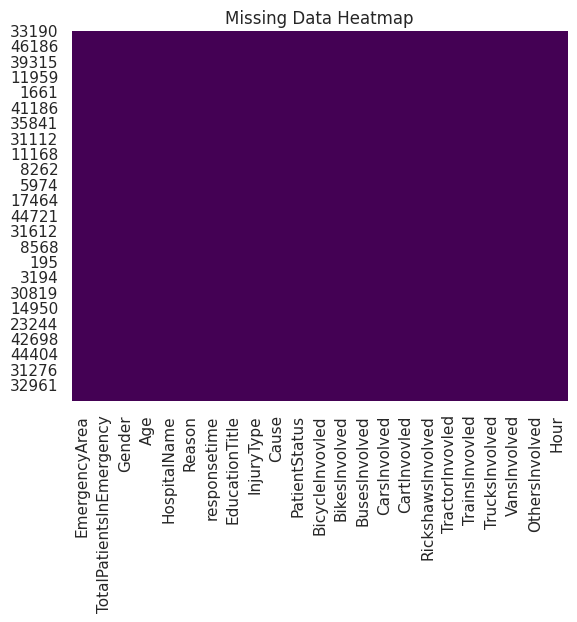

In [436]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [437]:
df.shape

(40231, 23)

**Dropping duplicate coloumns**

In [438]:
df = df.drop_duplicates()
df.shape

(40231, 23)

In [439]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype('float64')

#Encoding Categorical Features

### Hospital Name encoded with Label Encoding.

In [440]:
#apply label encoding for HospitalName
le = LabelEncoder()
df['HospitalName'] = le.fit_transform(df['HospitalName'])

### Emergency Area encoded with Frequence Encoding.

In [441]:
freq_encoding = df['EmergencyArea'].value_counts().to_dict()

df['EmergencyArea'] = df['EmergencyArea'].map(freq_encoding)

###Gender encoded with Label Encoding.

In [442]:
# encoder = OneHotEncoder(sparse_output=False)
# arr = encoder.fit_transform(df[['Gender']])

# en_df = pd.DataFrame(arr, columns=encoder.categories_[0])

# en_df.index = df.index

# df = pd.concat([df, en_df], axis=1)
# df.drop(['Gender'], axis=1, inplace=True)


In [443]:
# total_entries_gender = len(df)

# gender_percentage = (df[["Male", "Female", "Other"]].sum() / total_entries_gender) * 100

# gender_colors = ['#c10000', '#ff7800','#1330bf']


# plt.figure(figsize=(8, 6))
# sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette=gender_colors)


# for i, val in enumerate(gender_percentage.values):
#     plt.text(i, val + 1, f'{val:.3f}%', ha='center', fontsize=12)

# plt.xlabel('Gender')
# plt.ylabel('Percentage (%)')
# plt.title('Gender Distribution in Percentages')

# plt.show()

In [444]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

<!-- ###Reason & Cause encoded with Injury Type Traget Encoding. -->

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40231 entries, 33190 to 16460
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             40231 non-null  int64  
 1   TotalPatientsInEmergency  40231 non-null  float64
 2   Gender                    40231 non-null  int64  
 3   Age                       40231 non-null  float64
 4   HospitalName              40231 non-null  int64  
 5   Reason                    40231 non-null  object 
 6   responsetime              40231 non-null  float64
 7   EducationTitle            40231 non-null  object 
 8   InjuryType                40231 non-null  object 
 9   Cause                     40231 non-null  object 
 10  PatientStatus             40231 non-null  object 
 11  BicycleInvovled           40231 non-null  float64
 12  BikesInvolved             40231 non-null  float64
 13  BusesInvolved             40231 non-null  float64
 14  CarsInv

###Education Title encoded with Ordinal Encoding.

In [446]:
edu_order = [['Illetrate','Primary', 'Matric','Middle','Intermediate','Graduation','Masters','PHD']]

ordinal_encoder = OrdinalEncoder(categories=edu_order)

df['EducationTitle_Ordinal'] = ordinal_encoder.fit_transform(df[['EducationTitle']])

df.drop(['EducationTitle'], axis=1, inplace=True)


###Injury Type encoded with Ordinal Encoding.

In [447]:
injury_order = [['Minor','Single Fracture', 'Multiple Fractures','Spinal Injury','Head Injury']]

ordinal_encoder = OrdinalEncoder(categories=injury_order)

df['InjuryType_Ordinal'] = ordinal_encoder.fit_transform(df[['InjuryType']])

df.drop(['InjuryType'], axis=1, inplace=True)


<ipython-input-448-3483d2543e54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=injury_labels, order=injury_order[0], palette='viridis')


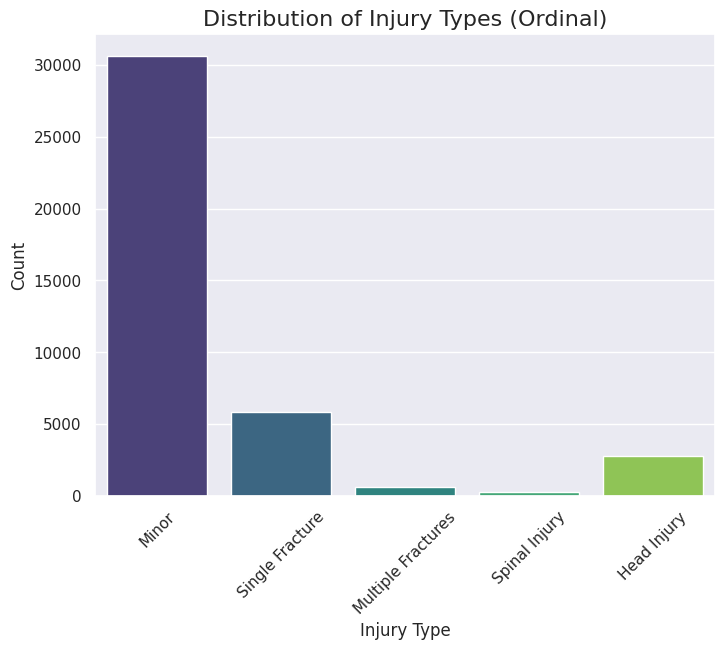

In [448]:
injury_mapping = {0: 'Minor', 1: 'Single Fracture', 2: 'Multiple Fractures',
                  3: 'Spinal Injury', 4: 'Head Injury'}

encoded_values = df['InjuryType_Ordinal']

injury_labels = [injury_mapping[val] for val in encoded_values]

plt.figure(figsize=(8, 6))
sns.countplot(x=injury_labels, order=injury_order[0], palette='viridis')

plt.title('Distribution of Injury Types (Ordinal)', fontsize=16)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.show()

###Reason encoded with Target Encoding With Injury Type.

In [449]:
target_encoding = df.groupby('Reason')['InjuryType_Ordinal'].mean().reset_index()
target_encoding.columns = ['Reason', 'InjuryType_TargetEncoding']

# Merge the target encoding back to the original dataframe
df = df.merge(target_encoding, on='Reason', how='left')

# Now update the 'Merged' column based on 'InjuryType_TargetEncoding'
df['Reason'] = df['InjuryType_TargetEncoding']

# Drop the Reason and Cause columns as well as the target encoding column
df.drop(['InjuryType_TargetEncoding'], axis=1, inplace=True)

# Show all columns in the dataframe
print(df.columns)
print(df)

Index(['EmergencyArea', 'TotalPatientsInEmergency', 'Gender', 'Age',
       'HospitalName', 'Reason', 'responsetime', 'Cause', 'PatientStatus',
       'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
       'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved',
       'Hour', 'EducationTitle_Ordinal', 'InjuryType_Ordinal'],
      dtype='object')
       EmergencyArea  TotalPatientsInEmergency  Gender   Age  HospitalName  \
0                  1                       1.0       1  48.0            31   
1                  1                       1.0       1  30.0           153   
2                  1                       1.0       1  35.0            31   
3                  1                       1.0       1  26.0           153   
4                  2                       1.0       1  23.0            31   
...              ...                       ...     ...   ...           ...   
40226   

###Cause encoded with Label Encoding.

In [450]:
le = LabelEncoder()
df['Cause'] = le.fit_transform(df['Cause'])

###PatientStatus encoded with Ordinal Encoding

In [451]:
Pstatus_order = [['Alive & unstable', 'Alive & stable', 'Dead']]

ordinal_encoder = OrdinalEncoder(categories=Pstatus_order)

df['Patient_Status_Ordinal'] = ordinal_encoder.fit_transform(df[['PatientStatus']])

df.drop(['PatientStatus'], axis=1, inplace=True)


<ipython-input-452-ee143b32b665>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Pstatus_labels, order=Pstatus_order[0], palette='viridis')


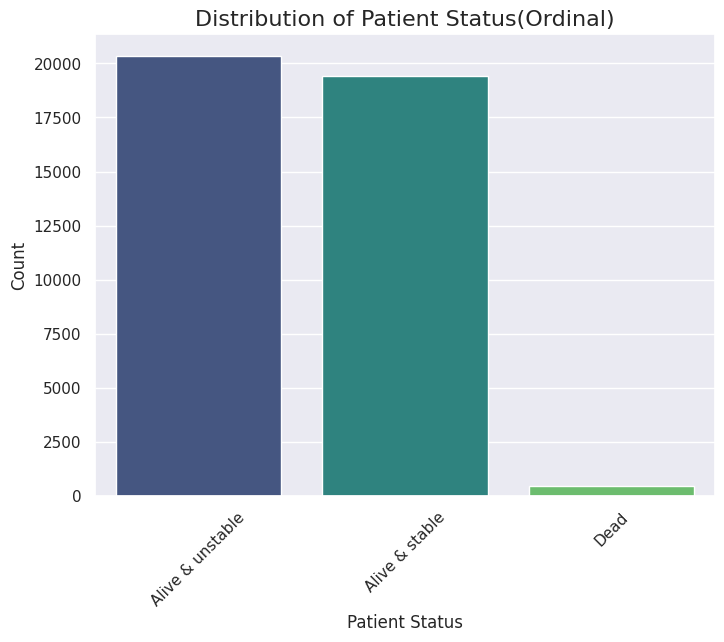

In [452]:
Pstatus_mapping = {0: 'Alive & stable', 1: 'Alive & unstable', 2: 'Dead'}

encoded_values = df['Patient_Status_Ordinal']

Pstatus_labels = [Pstatus_mapping[val] for val in encoded_values]

plt.figure(figsize=(8, 6))
sns.countplot(x=Pstatus_labels, order=Pstatus_order[0], palette='viridis')

plt.title('Distribution of Patient Status(Ordinal)', fontsize=16)
plt.xlabel('Patient Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.show()

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40231 entries, 0 to 40230
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             40231 non-null  int64  
 1   TotalPatientsInEmergency  40231 non-null  float64
 2   Gender                    40231 non-null  int64  
 3   Age                       40231 non-null  float64
 4   HospitalName              40231 non-null  int64  
 5   Reason                    40231 non-null  float64
 6   responsetime              40231 non-null  float64
 7   Cause                     40231 non-null  int64  
 8   BicycleInvovled           40231 non-null  float64
 9   BikesInvolved             40231 non-null  float64
 10  BusesInvolved             40231 non-null  float64
 11  CarsInvolved              40231 non-null  float64
 12  CartInvovled              40231 non-null  float64
 13  RickshawsInvolved         40231 non-null  float64
 14  Tracto

#Outlier Remove

###Draw Box polt

<Axes: xlabel='responsetime'>

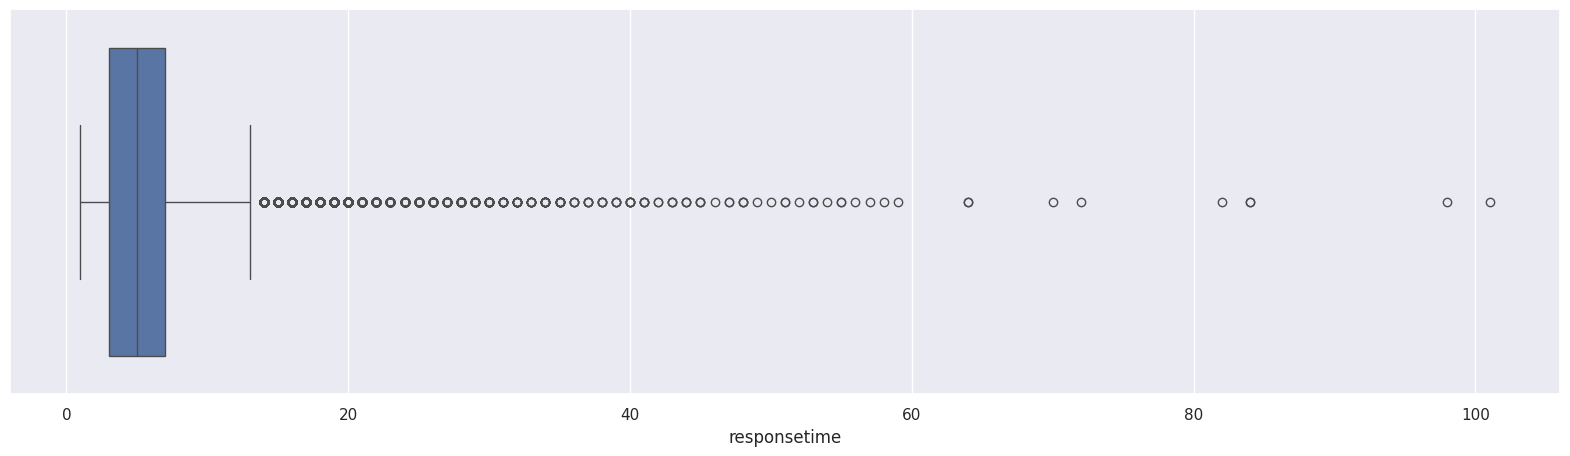

In [454]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['responsetime'])

In [455]:
x = 'responsetime'
min = df[x].min()
max = df[x].max()

q1=df[x].quantile(0.25)
q2=df[x].quantile(0.50)
q3=df[x].quantile(0.75)
IQR =q3 - q1


min_range = q1 - 1.5*IQR
max_range = q3 + 1.5*IQR

min , max , q1, q2, q3, IQR, min_range, max_range

(1.0, 101.0, 3.0, 5.0, 7.0, 4.0, -3.0, 13.0)

In [456]:
df.shape

(40231, 23)

In [457]:
df = df[df['responsetime'] < max_range]
df.shape

(36877, 23)

<Axes: xlabel='responsetime'>

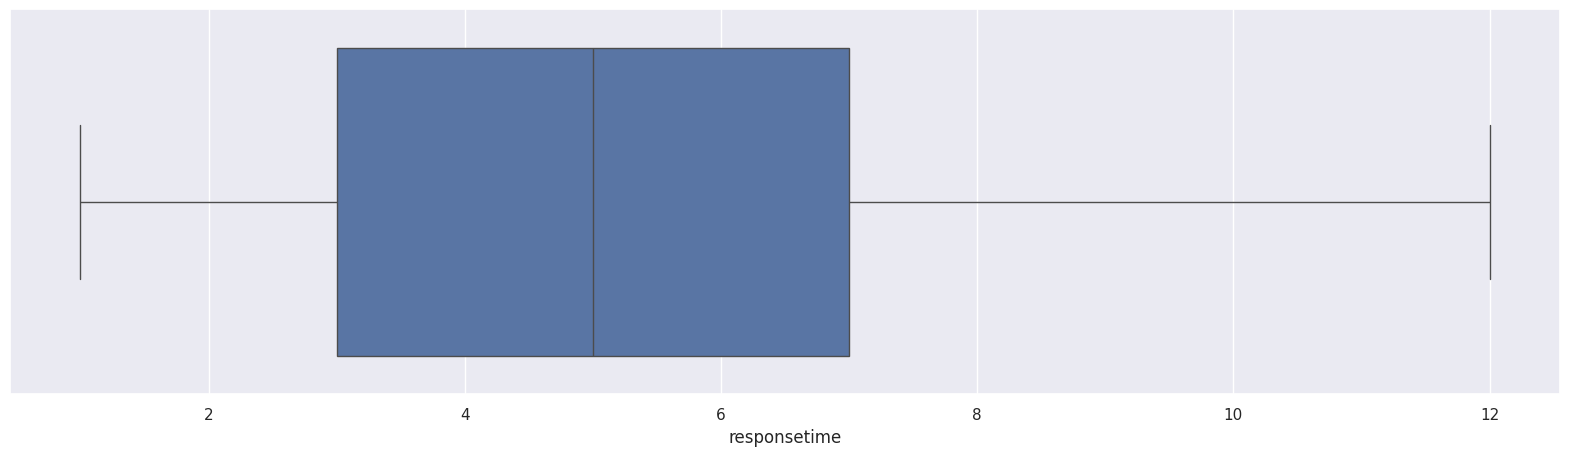

In [458]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['responsetime'])

<Axes: xlabel='Age'>

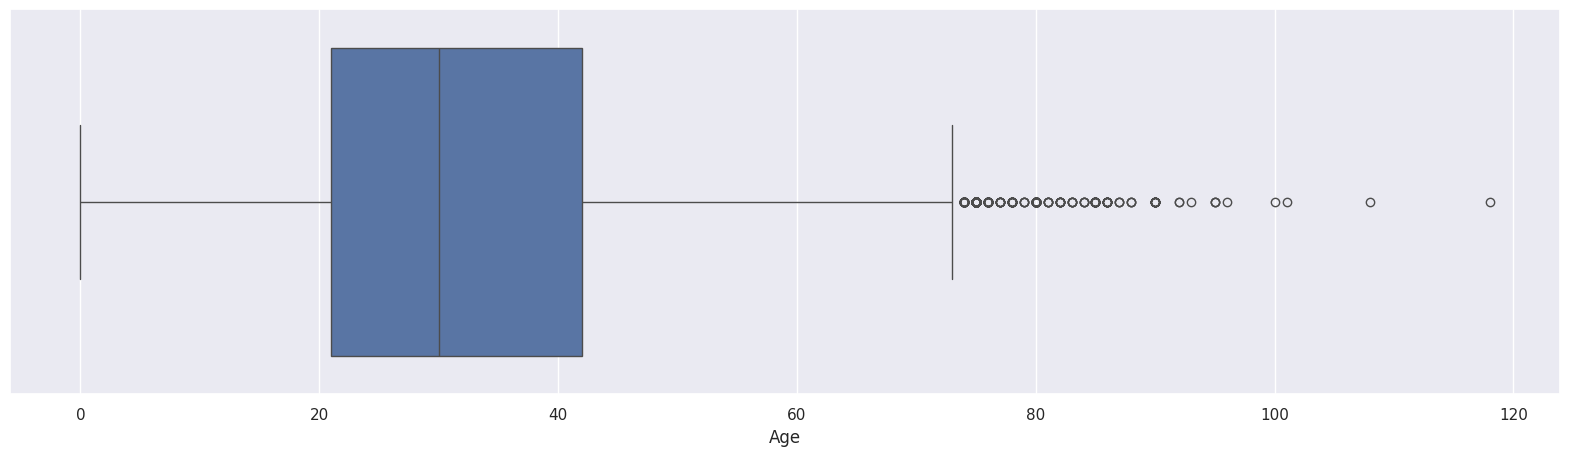

In [459]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['Age'])

In [460]:
x = 'Age'
min = df[x].min()
max = df[x].max()

q1=df[x].quantile(0.25)
q2=df[x].quantile(0.50)
q3=df[x].quantile(0.75)
IQR =q3 - q1


min_range = q1 - 1.5*IQR
max_range = q3 + 1.5*IQR

min , max , q1, q2, q3, IQR, min_range, max_range

(0.0, 118.0, 21.0, 30.0, 42.0, 21.0, -10.5, 73.5)

In [461]:
df.shape

(36877, 23)

In [462]:
df = df[df['Age'] < max_range]
df.shape

(36497, 23)

<Axes: xlabel='Age'>

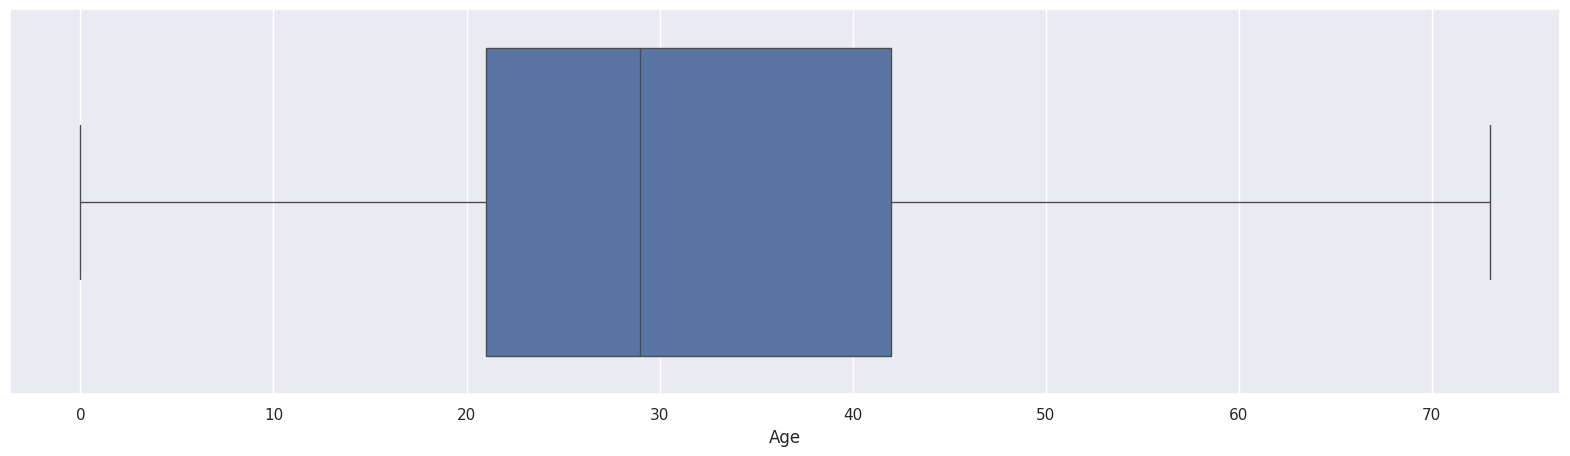

In [463]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['Age'])

#Applying Mean Normalization for Feature Scaling

###Normalization for Response Time

In [464]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to column 'A'
df['Age'] = scaler.fit_transform(df[['Age']])
df['responsetime'] = scaler.fit_transform(df[['responsetime']])

###Normalization for Emergency Area

<Axes: xlabel='InjuryType_Ordinal', ylabel='EmergencyArea'>

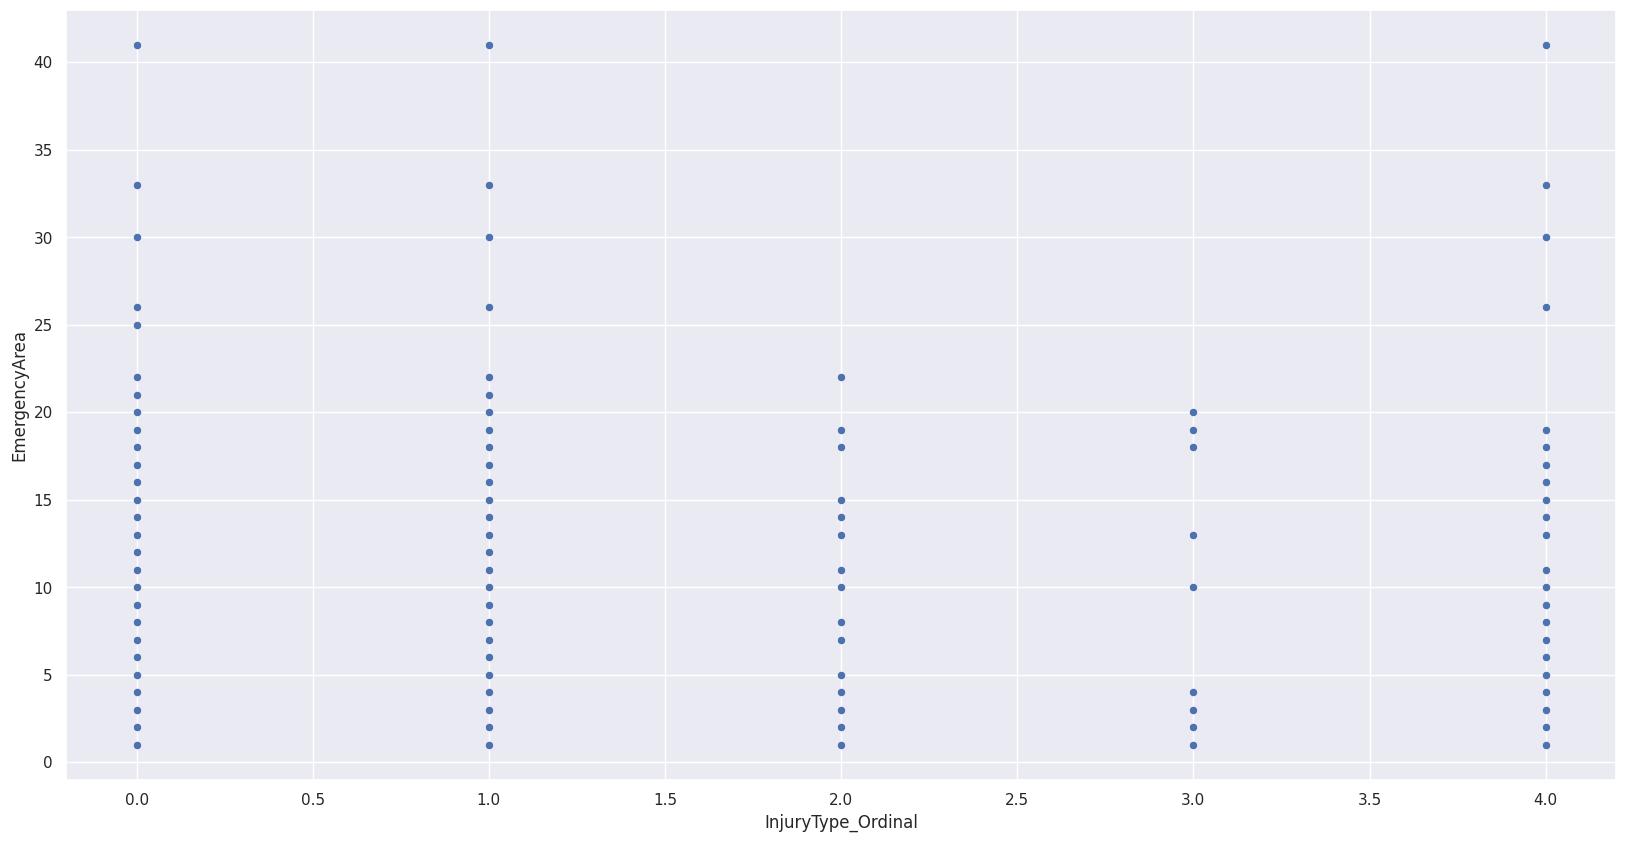

In [465]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['EmergencyArea'])

In [466]:
# df['EmergencyArea']  = (df['EmergencyArea'] - df['EmergencyArea'].mean())/df['EmergencyArea'].max()

<Axes: xlabel='InjuryType_Ordinal', ylabel='EmergencyArea'>

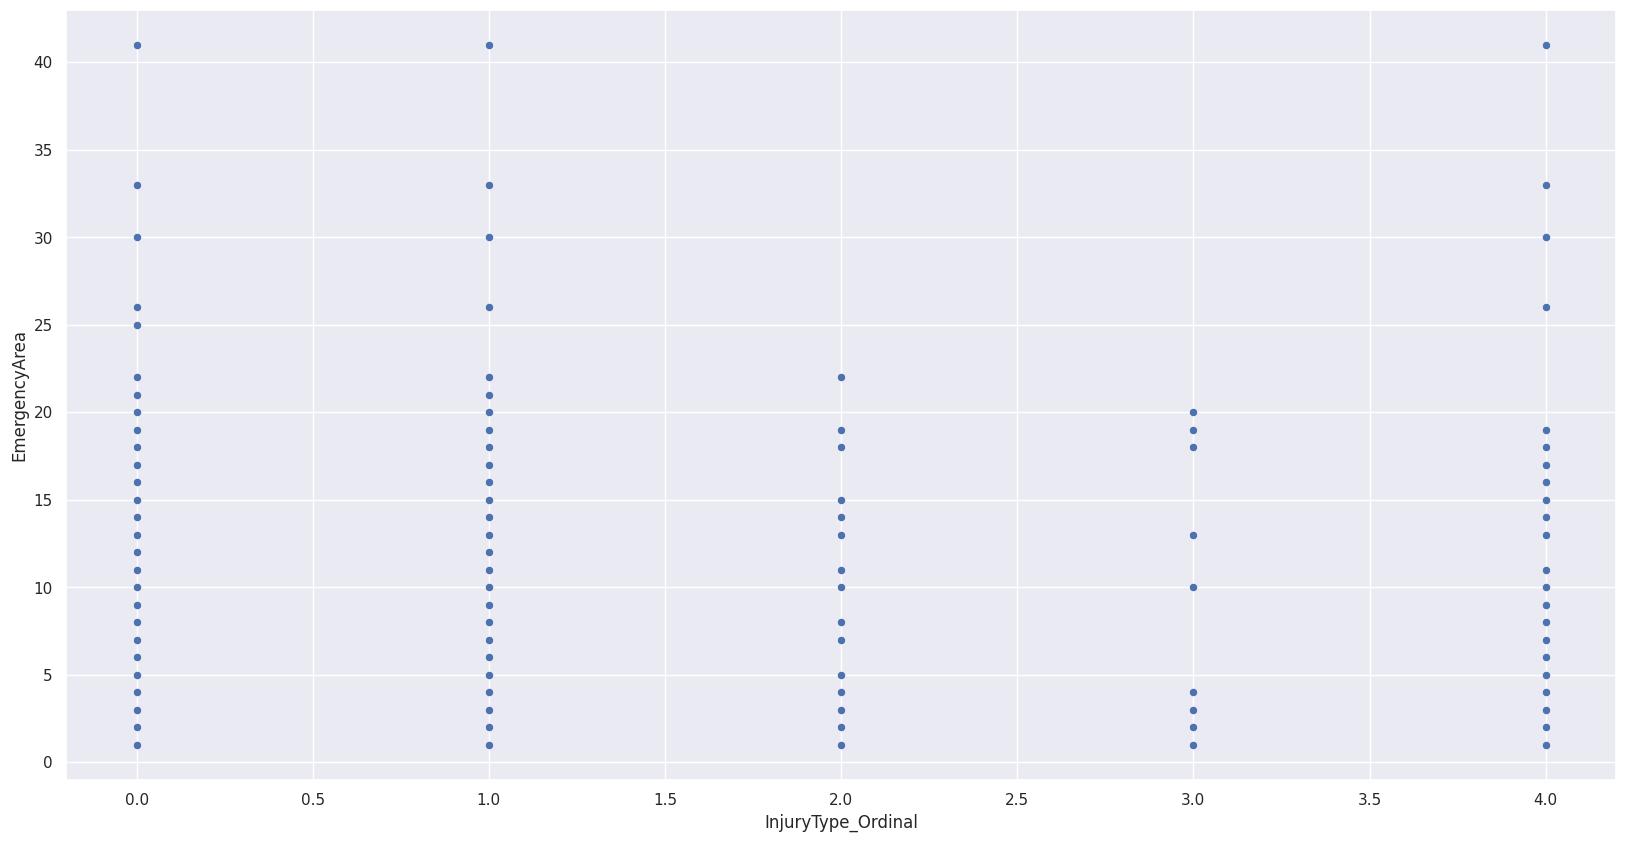

In [467]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['EmergencyArea'])

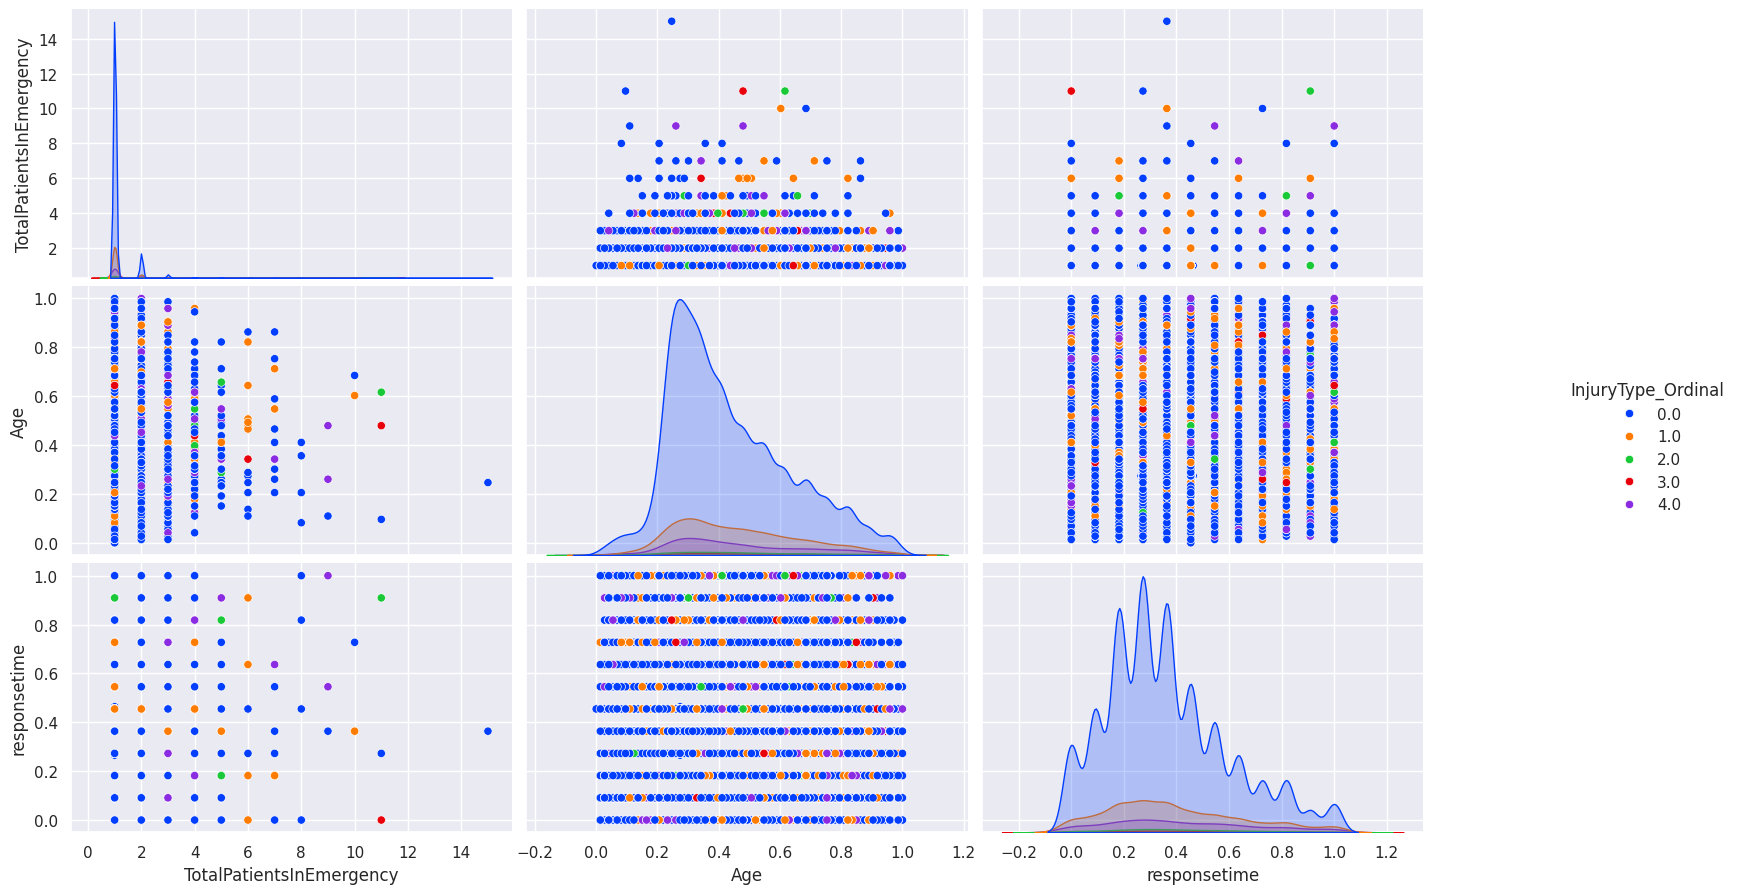

In [468]:
import seaborn as sns
import matplotlib.pyplot as plt


pairplot = sns.pairplot(df[['InjuryType_Ordinal', 'TotalPatientsInEmergency', 'Age', 'responsetime']],
                         hue='InjuryType_Ordinal',
                         palette='bright',
                         height=3)


plt.subplots_adjust(top=0.9)
plt.gcf().set_size_inches(18, 10)

plt.show()



Categorical Columns: ['TotalPatientsInEmergency', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'EducationTitle_Ordinal', 'InjuryType_Ordinal', 'Patient_Status_Ordinal']


<ipython-input-469-06f653d463de>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)
<ipython-input-469-06f653d463de>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)
<ipython-input-469-06f653d463de>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)
<ipython-input-469-06f653d463de>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)
<ipython-input-469-06f653d463de>:26: UserWarning: set_ticklabels() should on

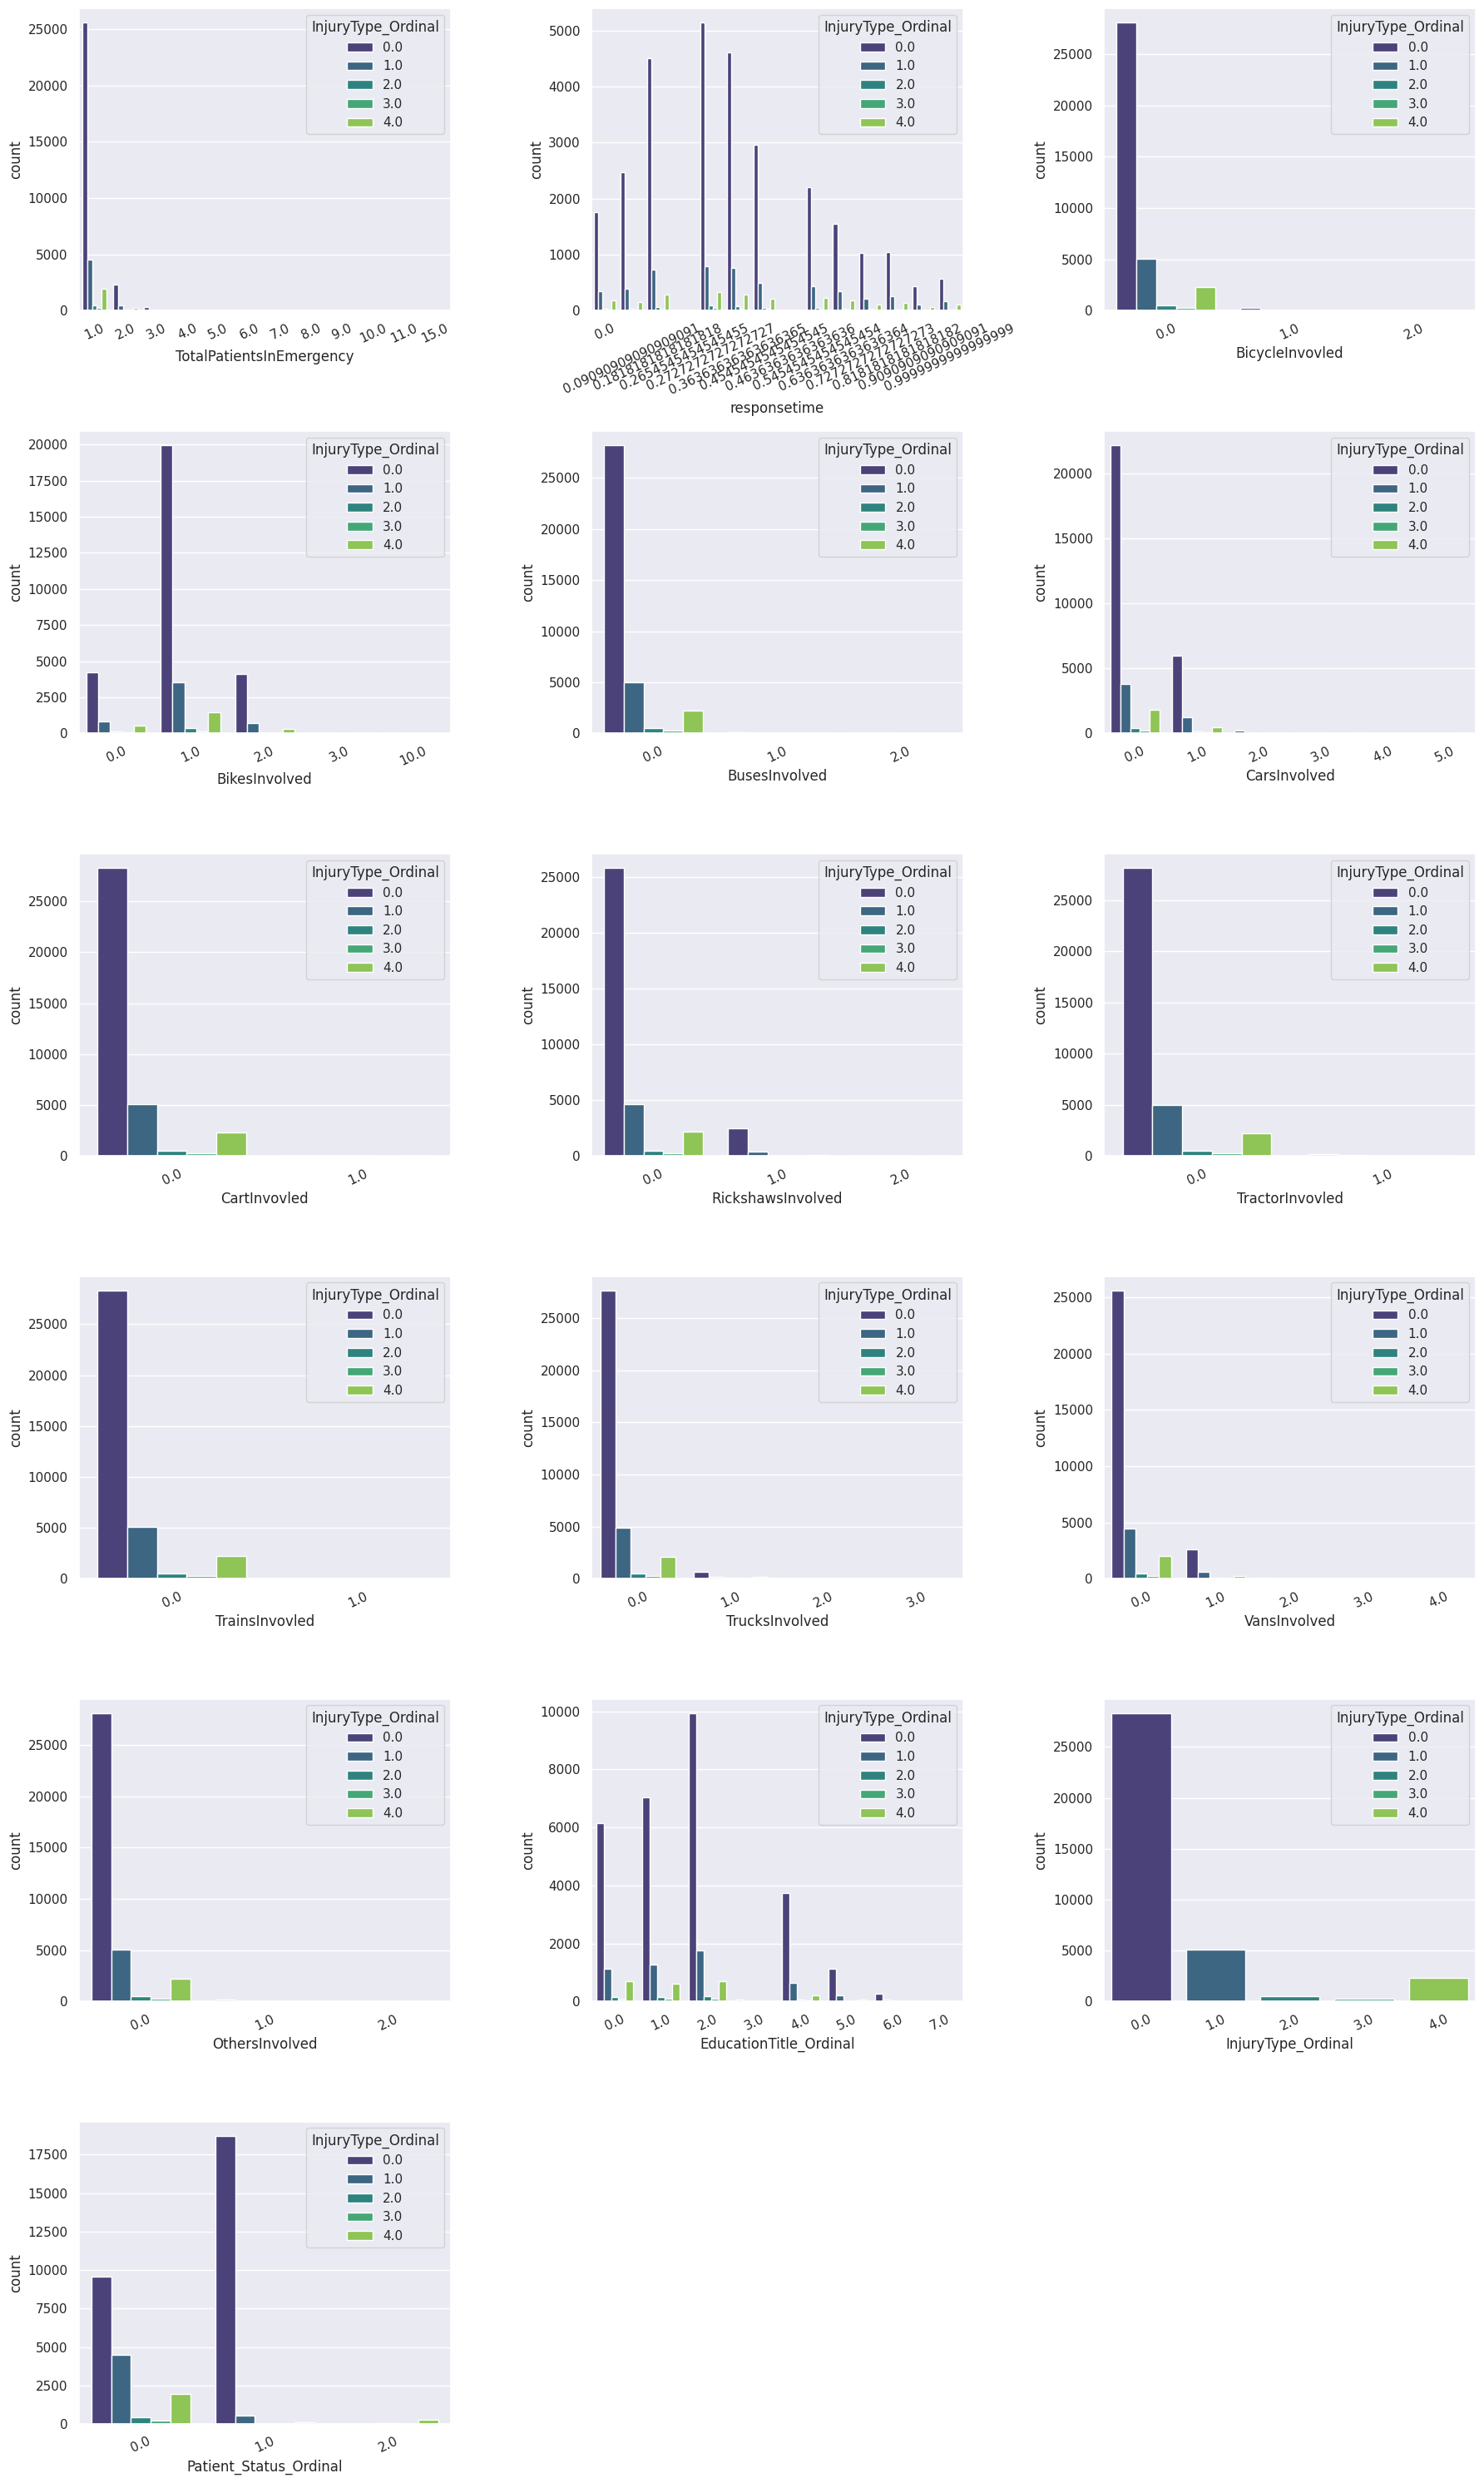

In [469]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns with fewer than 15 unique values
categories = [col for col in df.columns if (df[col].dtype == 'float64' and df[col].nunique() < 15)]
print("Categorical Columns:", categories)

# Define number of rows and columns based on the number of categories
num_plots = len(categories)
rows = (num_plots // 3) + (num_plots % 3)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, rows * 5))

# Adjust spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define a custom color palette (using 'viridis' as an example)
custom_palette = sns.color_palette("viridis", n_colors=df['InjuryType_Ordinal'].nunique())

# Iterate through categorical columns and create count plots
for i, col in enumerate(categories):
    # Create countplot for each categorical column, with 'InjuryType_Ordinal' hue and custom palette
    sns.countplot(data=df, x=col, hue="InjuryType_Ordinal", ax=axes[i], palette=custom_palette)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=25)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plots
plt.tight_layout()
plt.show()


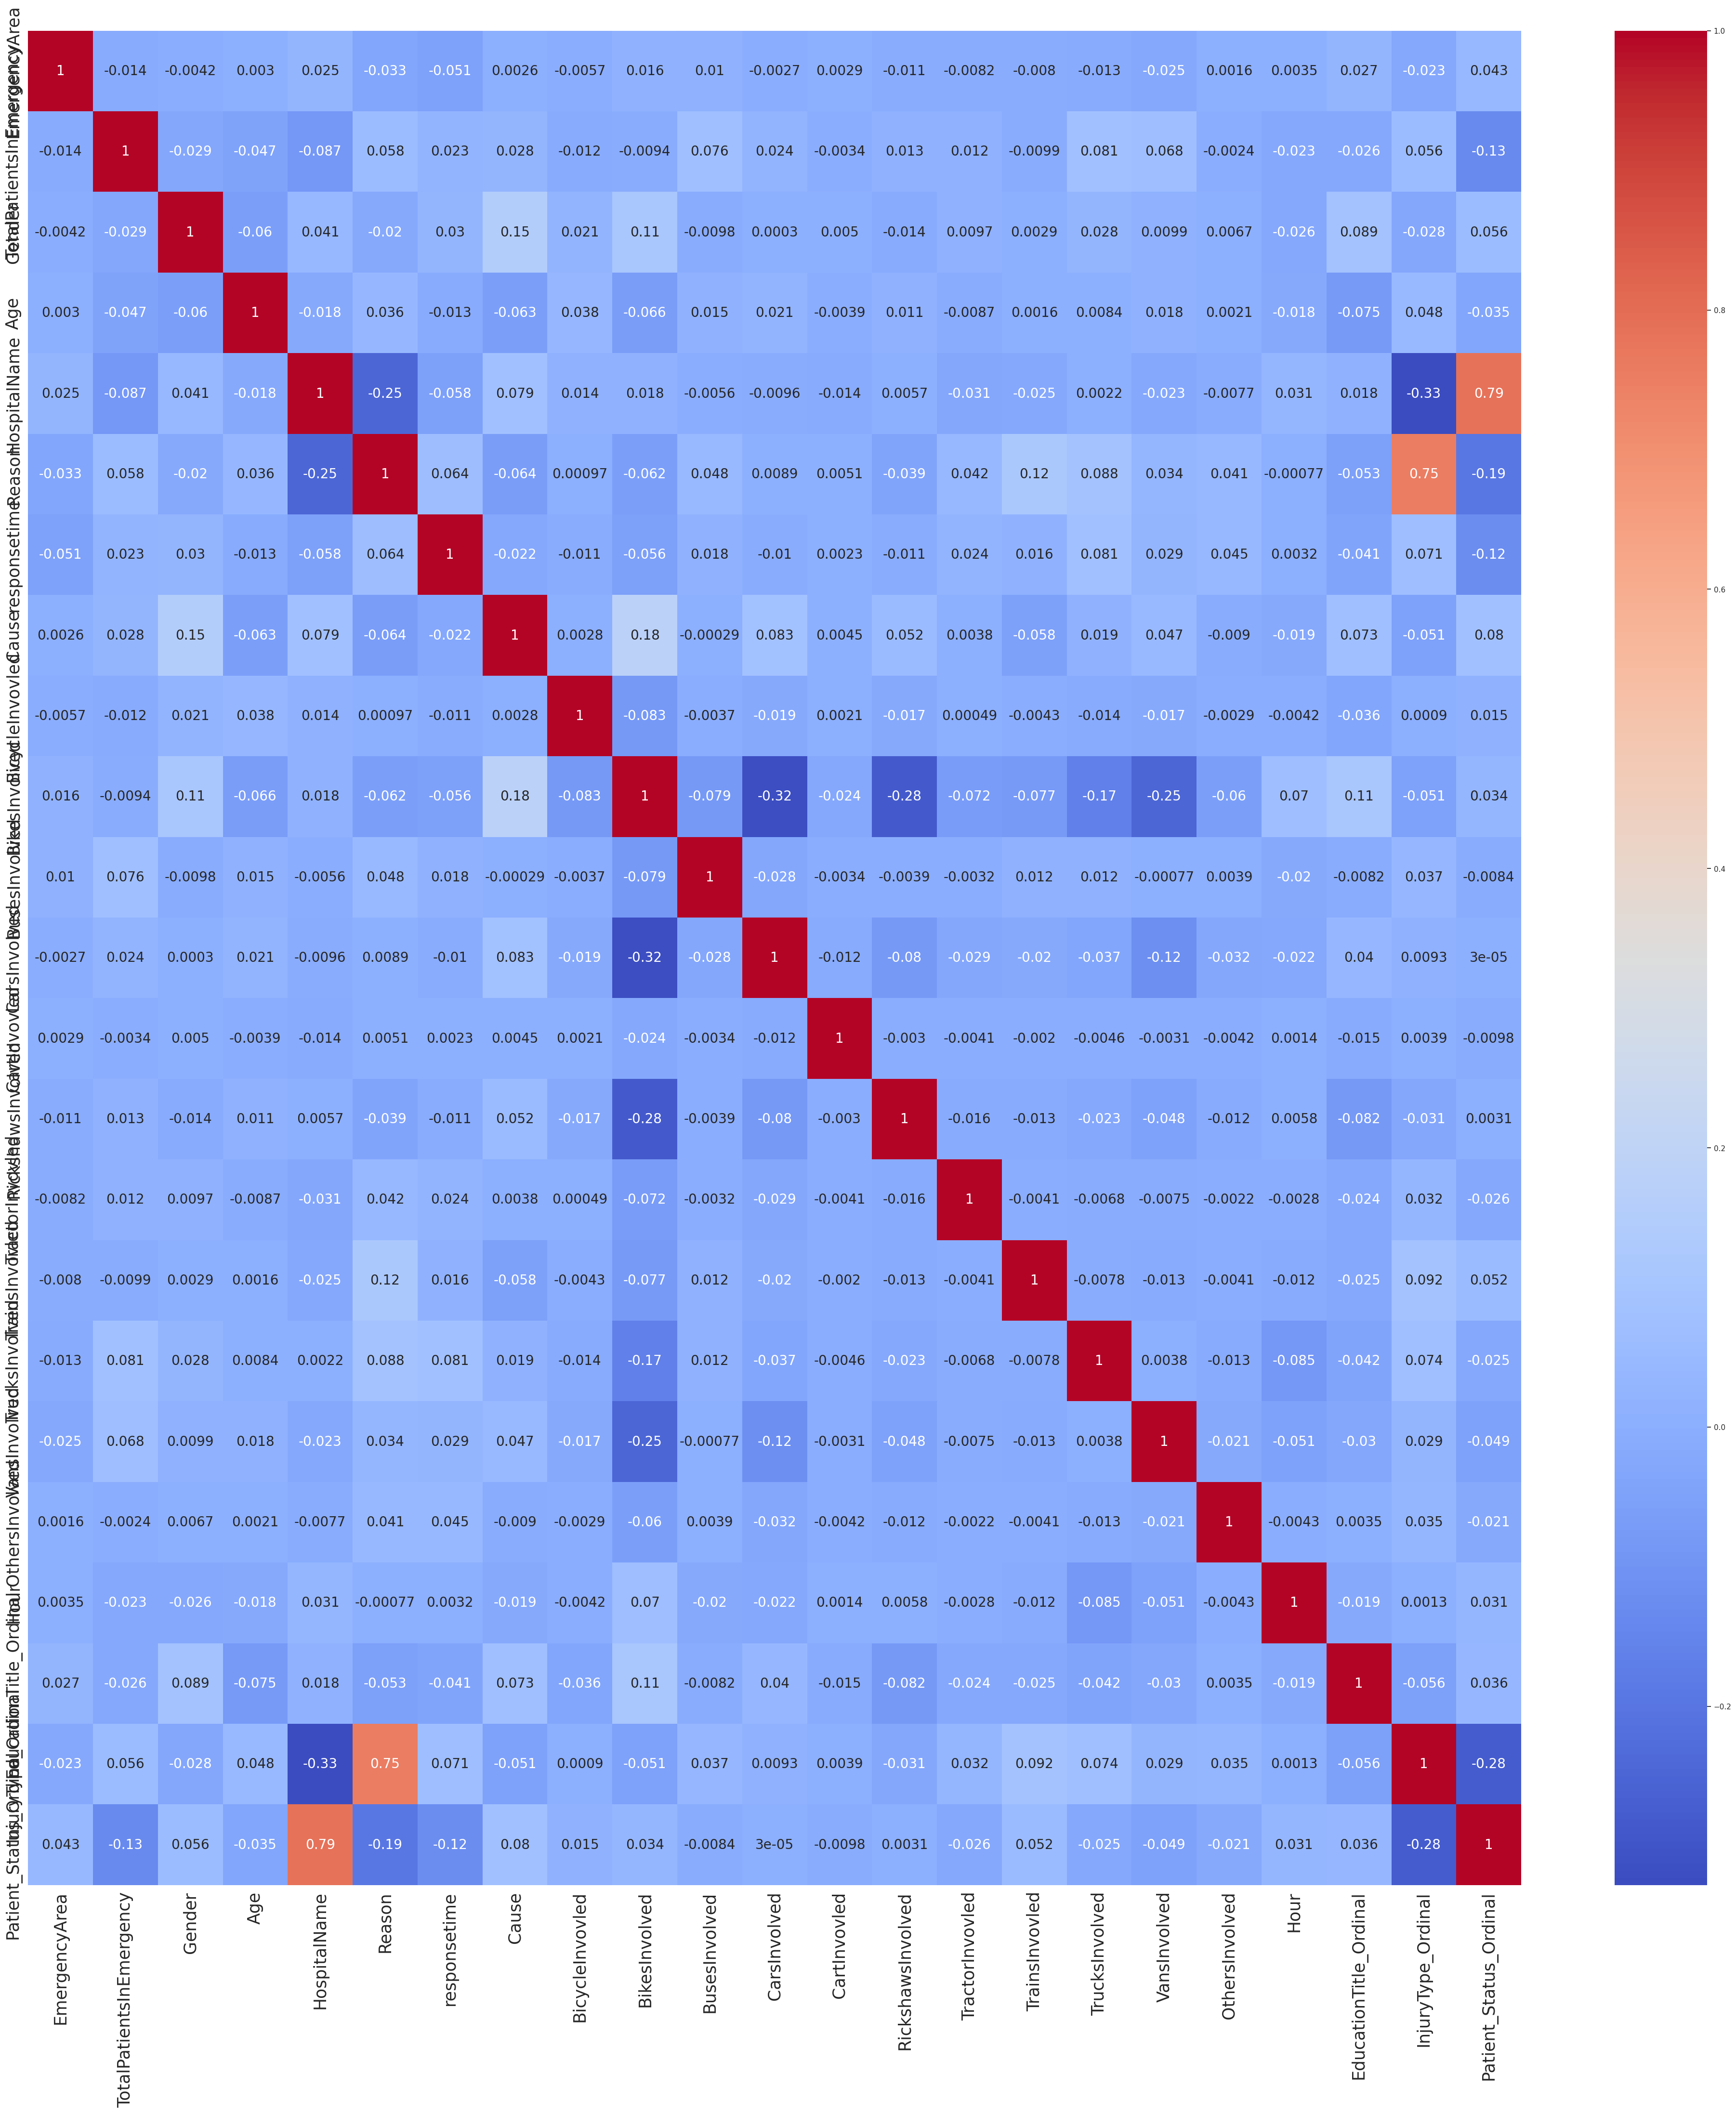

In [470]:
numeric_df = df.select_dtypes(include=[np.number])

sns.set(font_scale=1)
plt.subplots(figsize=(50, 50))

heat_plot = sns.heatmap(numeric_df.corr(method='pearson'), annot=True, cmap='coolwarm', annot_kws={'size': 20})

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.show()

#Data Partitioning: Implementing Train-Test Split

In [471]:
x = df.drop(columns=['InjuryType_Ordinal'])

y = df['InjuryType_Ordinal']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (29197, 22)
x_test shape: (7300, 22)
y_train shape: (29197,)
y_test shape: (7300,)


#Assignment----2

##Target Variable Injury Type

###Apply Logistic Regression


####Train Logistic Regression model on the train set

In [472]:
from sklearn.linear_model import LogisticRegression

In [473]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [474]:
log_reg.score(x_train, y_train)

0.8595746138301881

In [475]:
log_reg.score(x_test, y_test)

0.8580821917808219

####Test the trained model on the test set

In [476]:
predicted_result = log_reg.predict(x_test)

####Evaluate the performance on the test set using the following metrics:

In [477]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


#####a. Accuracy

In [478]:
accuracy = accuracy_score(y_test, predicted_result)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.86


#####b. Confusion Matrix

In [479]:
conf_matrix = confusion_matrix(y_test, predicted_result)

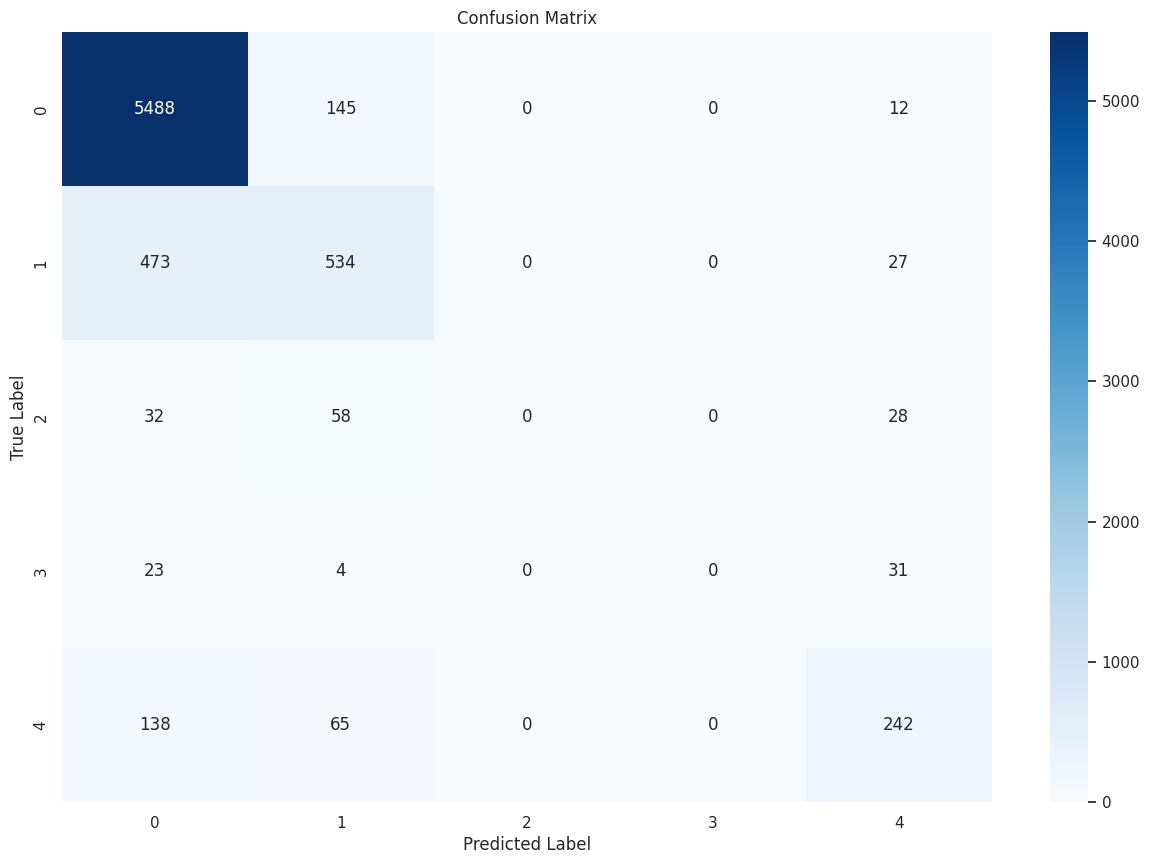

In [480]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true labels
cm = confusion_matrix(y_test, predicted_result)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#####c. Precision

In [481]:
precision = precision_score(y_test, predicted_result, average='weighted')
print(f'Precision: {precision:.2f}')


Precision: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#####d. Recall

In [482]:
recall = recall_score(y_test, predicted_result, average='weighted')
print(f'Recall: {recall:.2f}')


Recall: 0.86


#####e. F1 Score

In [483]:
f1 = f1_score(y_test, predicted_result, average='weighted')
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.84


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-484-252f32ece572>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


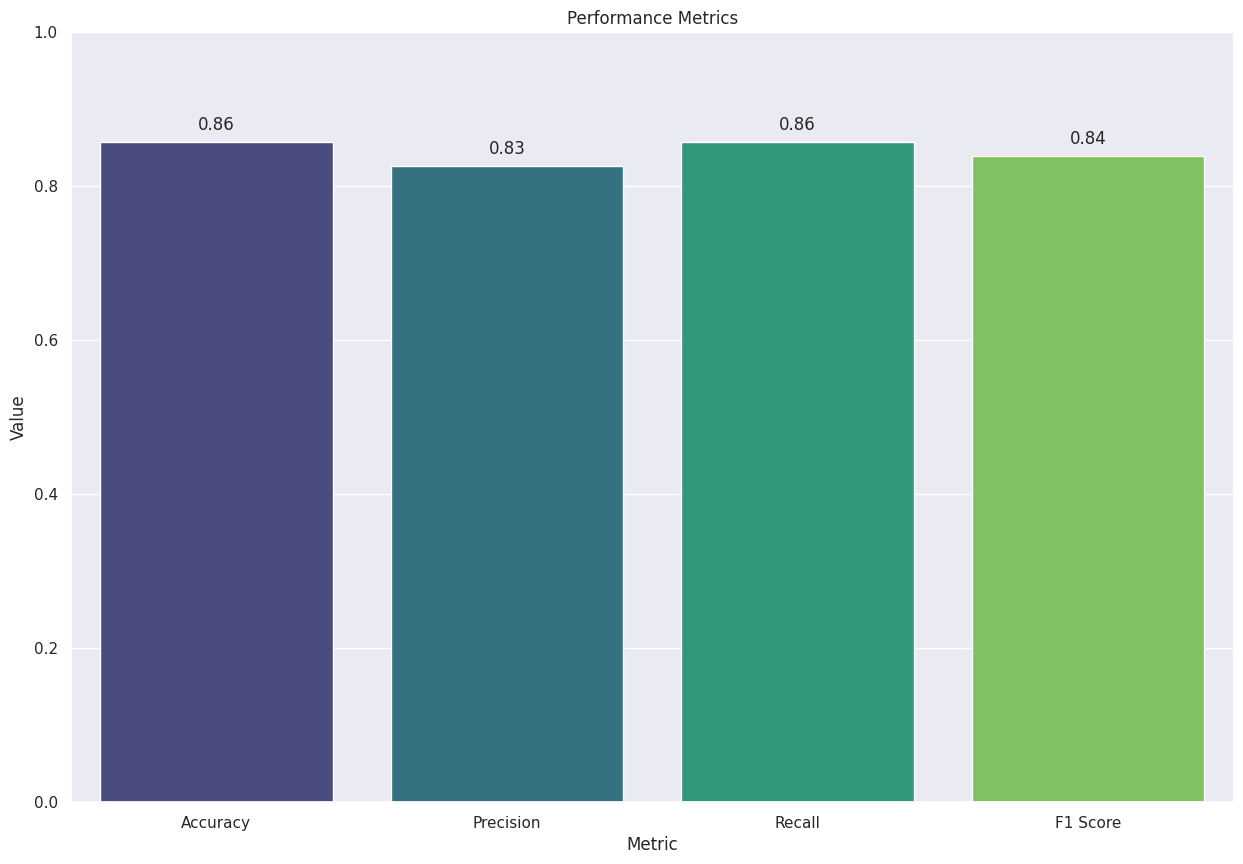

In [484]:
# Plot Accuracy, Precision, Recall, F1 Score metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

####Plot Accuracy (y-axis) vs Solver (x-axis)

In [485]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
solver_accuracies = []

for solver in solvers:
    try:
        log_reg = LogisticRegression(solver=solver)
        log_reg.fit(x_train, y_train)
        predicted_result = log_reg.predict(x_test)
        accuracy = accuracy_score(y_test, predicted_result)
        solver_accuracies.append(accuracy)
        print(f"Solver: {solver}, Accuracy: {accuracy:.4f}")
    except Exception as e:
        solver_accuracies.append(np.nan)
        print(f"Solver {solver} raised an error: {e}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Accuracy: 0.8581
Solver: liblinear, Accuracy: 0.8605
Solver: newton-cg, Accuracy: 0.8644
Solver: newton-cholesky, Accuracy: 0.8607


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Accuracy: 0.8641
Solver: saga, Accuracy: 0.8648


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


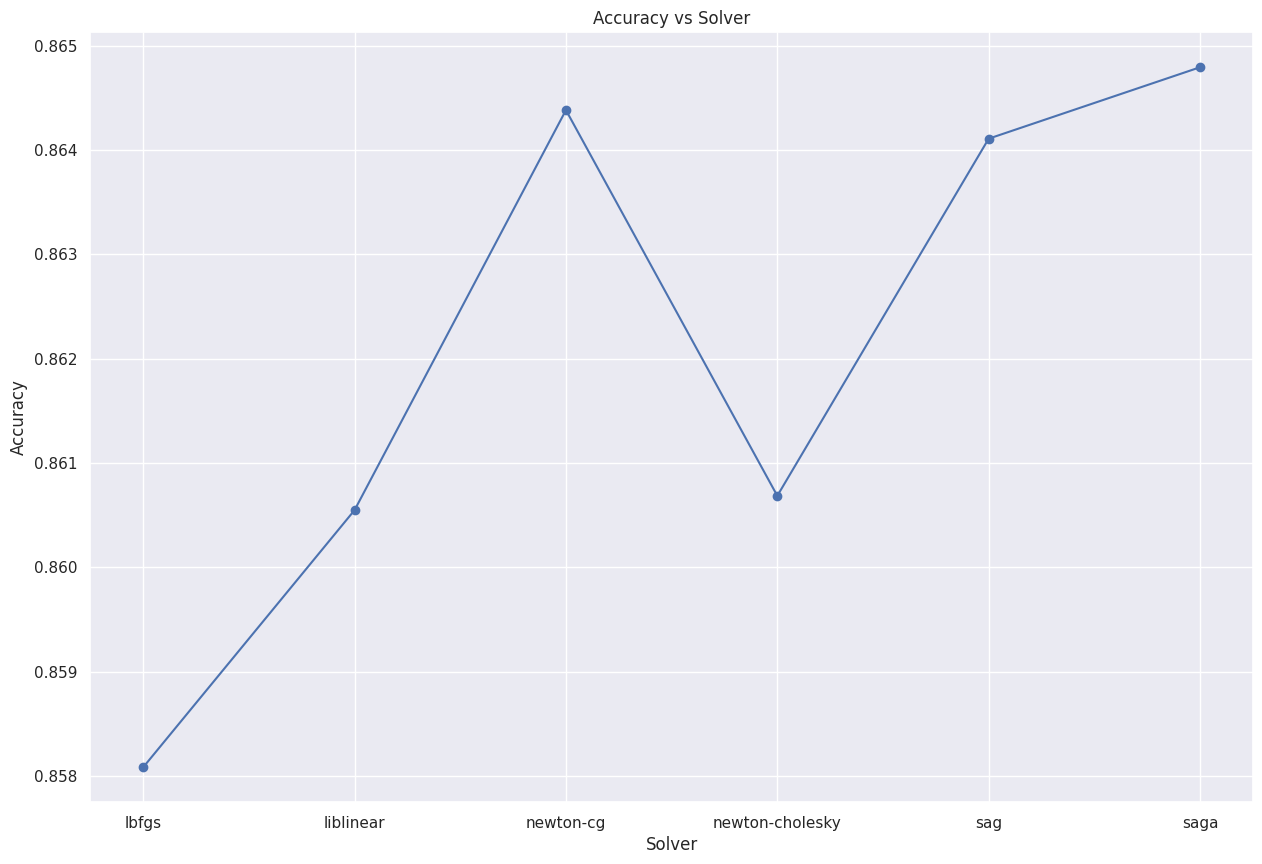

In [486]:
# Plot Accuracy vs Solver
plt.figure(figsize=(15, 10))
plt.plot(solvers, solver_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Solver')
plt.grid(True)
plt.show()

####Plot Accuracy (y-axis) vs Max_iter (x-axis)

In [487]:
max_iters = [50, 100, 150, 200, 250, 300]
iter_accuracies = []

for max_iter in max_iters:
    log_reg = LogisticRegression(max_iter=max_iter)
    log_reg.fit(x_train, y_train)
    predicted_result = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, predicted_result)
    iter_accuracies.append(accuracy)
    print(f"Max Iterations: {max_iter}, Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 50, Accuracy: 0.8426


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 100, Accuracy: 0.8581


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 150, Accuracy: 0.8614


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 200, Accuracy: 0.8621


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 250, Accuracy: 0.8627
Max Iterations: 300, Accuracy: 0.8640


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


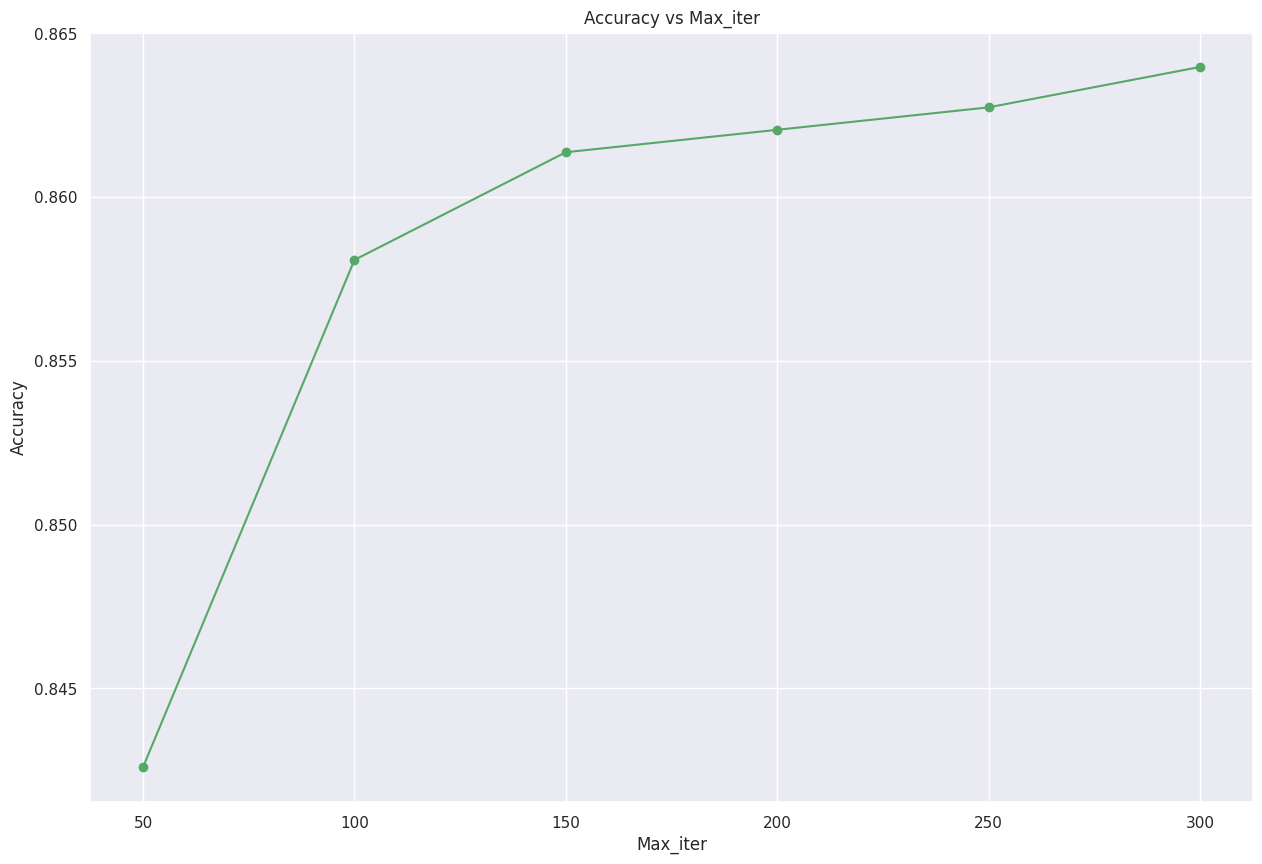

In [488]:
# Plot Accuracy vs Max_iter
plt.figure(figsize=(15, 10))
plt.plot(max_iters, iter_accuracies, marker='o', linestyle='-', color='g')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max_iter')
plt.grid(True)
plt.show()

##Target Variable Patient Status

###Data Partitioning

In [489]:
x2 = df.drop(columns=['Patient_Status_Ordinal'])

y2 = df['Patient_Status_Ordinal']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=40)

print("x2_train shape:", x2_train.shape)
print("x2_test shape:", x2_test.shape)
print("y2_train shape:", y2_train.shape)
print("y2_test shape:", y2_test.shape)

x2_train shape: (29197, 22)
x2_test shape: (7300, 22)
y2_train shape: (29197,)
y2_test shape: (7300,)


###Apply Logistic Regression


####Train Logistic Regression model on the train set

In [490]:
from sklearn.linear_model import LogisticRegression

In [491]:
log_reg2 = LogisticRegression(random_state=40)
log_reg2.fit(x2_train, y2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [492]:
log_reg2.score(x2_train, y2_train)

0.9218755351577217

In [493]:
log_reg2.score(x2_test, y2_test)

0.9131506849315069

In [494]:
predicted_result2 = log_reg2.predict(x2_test)

####Test the trained model on the test set

In [495]:
predicted_result2 = log_reg2.predict(x2_test)

####Evaluate the performance on the test set using the following metrics:

In [496]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


#####a. Accuracy

In [497]:
accuracy2 = accuracy_score(y2_test, predicted_result2)
print(f'Accuracy2: {accuracy2:.2f}')


Accuracy2: 0.91


#####b. Confusion Matrix

In [498]:
conf_matrix2 = confusion_matrix(y2_test, predicted_result2)
print('Confusion Matrix2:')
print(conf_matrix2)


Confusion Matrix2:
[[2914  471    8]
 [  89 3747    4]
 [  59    3    5]]


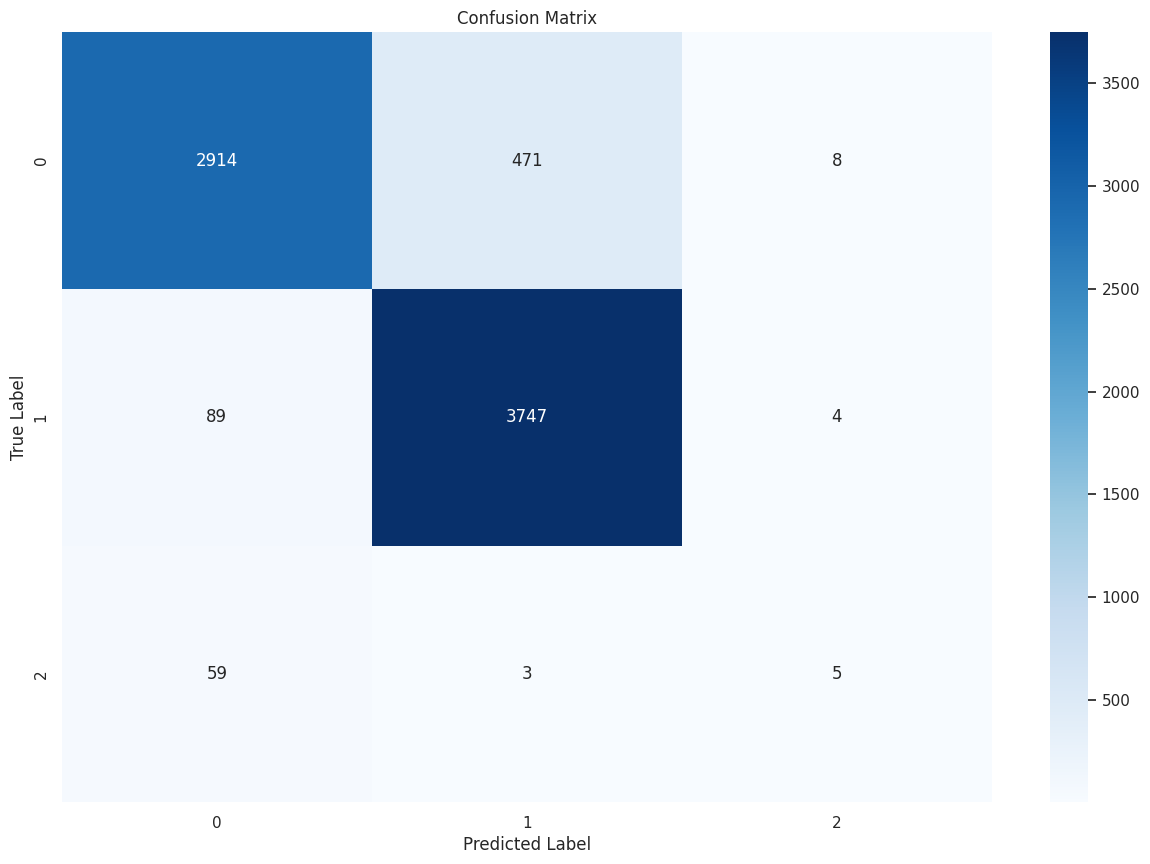

In [499]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true labels
cm = confusion_matrix(y2_test, predicted_result2)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#####c. Precision

In [500]:
precision2 = precision_score(y2_test, predicted_result2, average='weighted')
print(f'Precision2: {precision2:.2f}')


Precision2: 0.91


#####d. Recall

In [501]:
recall2 = recall_score(y2_test, predicted_result2, average='weighted')
print(f'Recall2: {recall2:.2f}')


Recall2: 0.91


#####e. F1 Score

In [502]:
Psf1 = f1_score(y2_test, predicted_result2, average='weighted')
print(f'F1 Score: {Psf1:.2f}')


F1 Score: 0.91


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-503-a45f826cbed8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


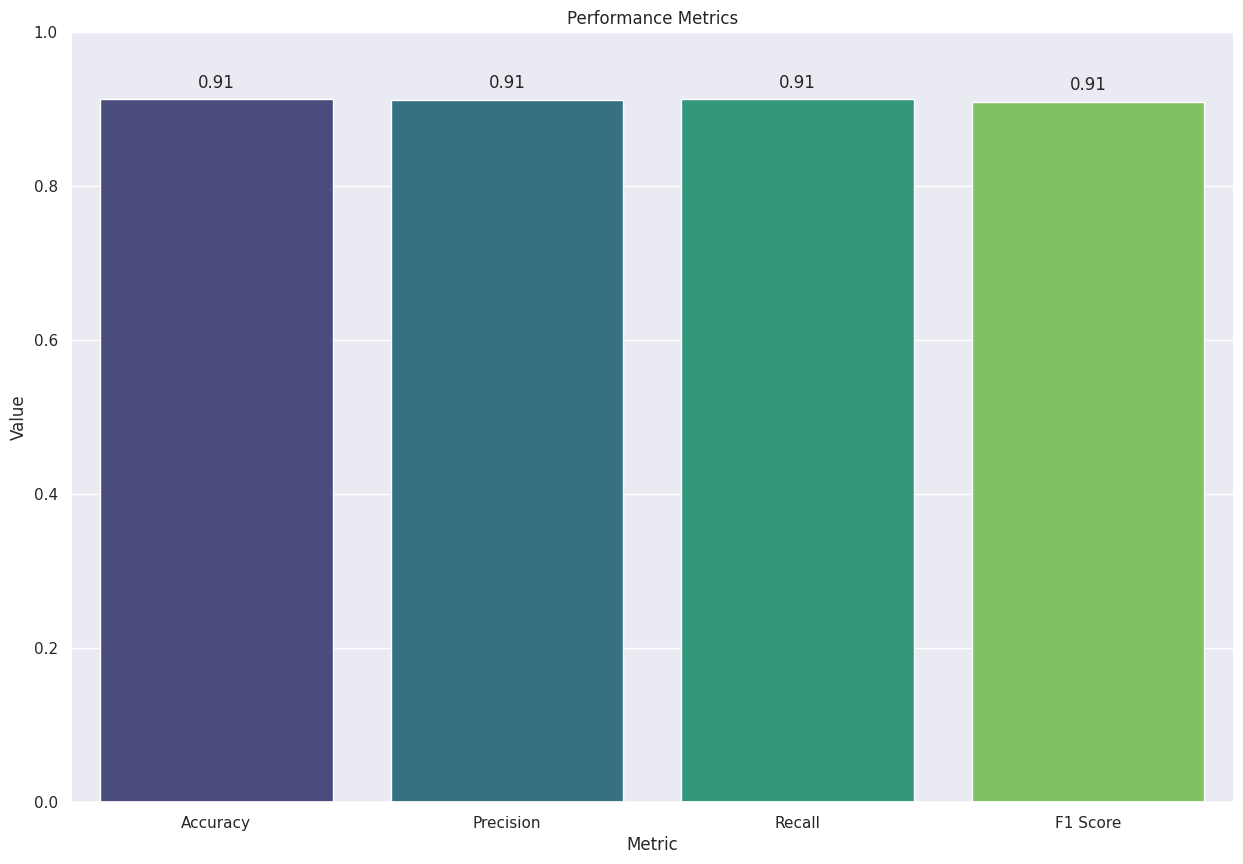

In [503]:
# Plot Accuracy, Precision, Recall, F1 Score metrics
metrics = {'Accuracy': accuracy2, 'Precision': precision2, 'Recall': recall2, 'F1 Score': Psf1}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

####Plot Accuracy (y-axis) vs Solver (x-axis)

In [504]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
solver_accuracies = []

for solver in solvers:
    try:
        log_reg2 = LogisticRegression(solver=solver)
        log_reg2.fit(x2_train, y2_train)
        predicted_result2 = log_reg2.predict(x2_test)
        accuracy2 = accuracy_score(y2_test, predicted_result2)
        solver_accuracies.append(accuracy2)
        print(f"Solver: {solver}, Accuracy: {accuracy2:.4f}")
    except Exception as e:
        solver_accuracies.append(np.nan)
        print(f"Solver {solver} raised an error: {e}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Accuracy: 0.9132
Solver: liblinear, Accuracy: 0.9334
Solver: newton-cg, Accuracy: 0.9499
Solver: newton-cholesky, Accuracy: 0.9408


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Accuracy: 0.9218
Solver: saga, Accuracy: 0.9160


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


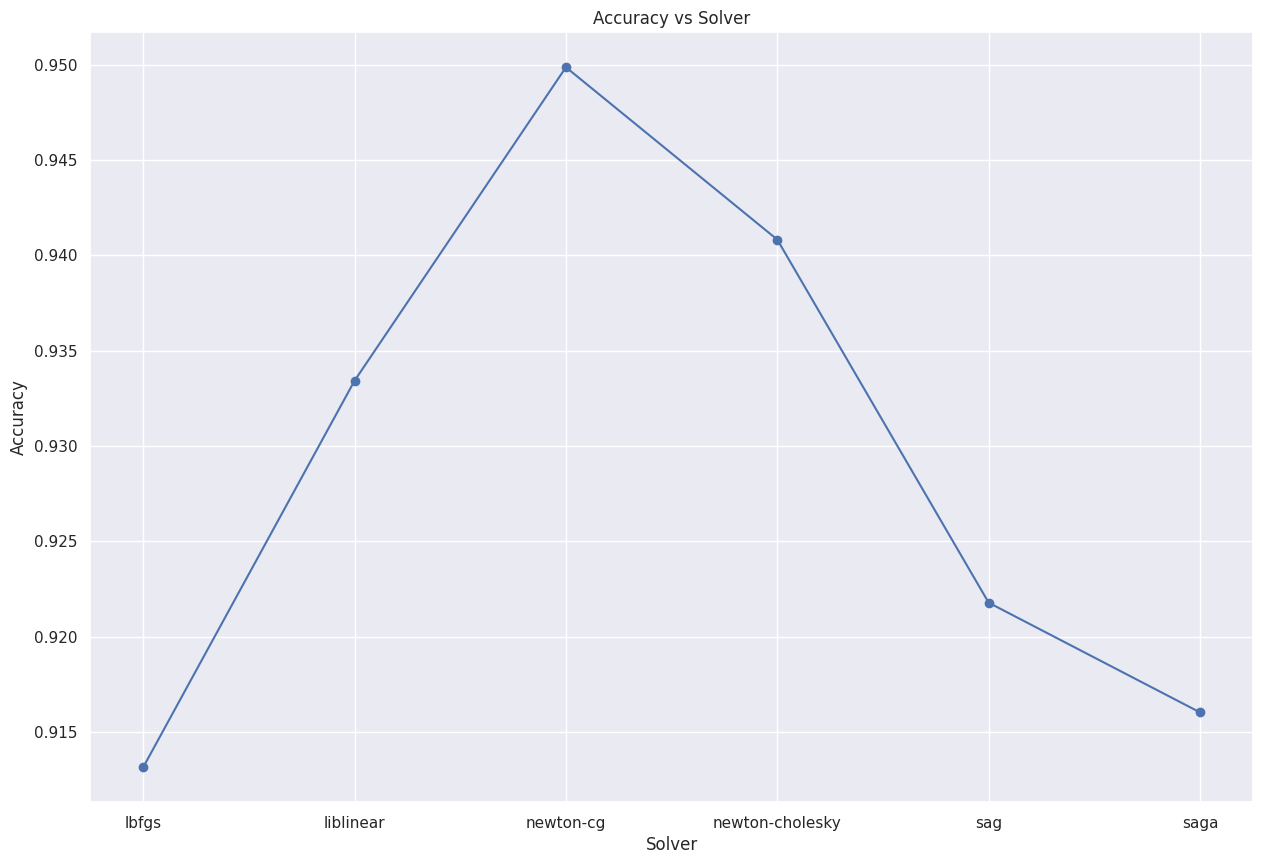

In [505]:
# Plot Accuracy vs Solver
plt.figure(figsize=(15, 10))
plt.plot(solvers, solver_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Solver')
plt.grid(True)
plt.show()

####Plot Accuracy (y-axis) vs Max_iter (x-axis)

In [506]:
max_iters = [50, 100, 150, 200, 250, 300]
iter_accuracies = []

for max_iter in max_iters:
    log_reg2 = LogisticRegression(max_iter=max_iter)
    log_reg2.fit(x2_train, y2_train)
    predicted_result2 = log_reg2.predict(x2_test)
    accuracy2 = accuracy_score(y2_test, predicted_result2)
    iter_accuracies.append(accuracy2)
    print(f"Max Iterations: {max_iter}, Accuracy: {accuracy2:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 50, Accuracy: 0.8995


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 100, Accuracy: 0.9132


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 150, Accuracy: 0.9218


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 200, Accuracy: 0.9204


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Iterations: 250, Accuracy: 0.9279
Max Iterations: 300, Accuracy: 0.9310


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


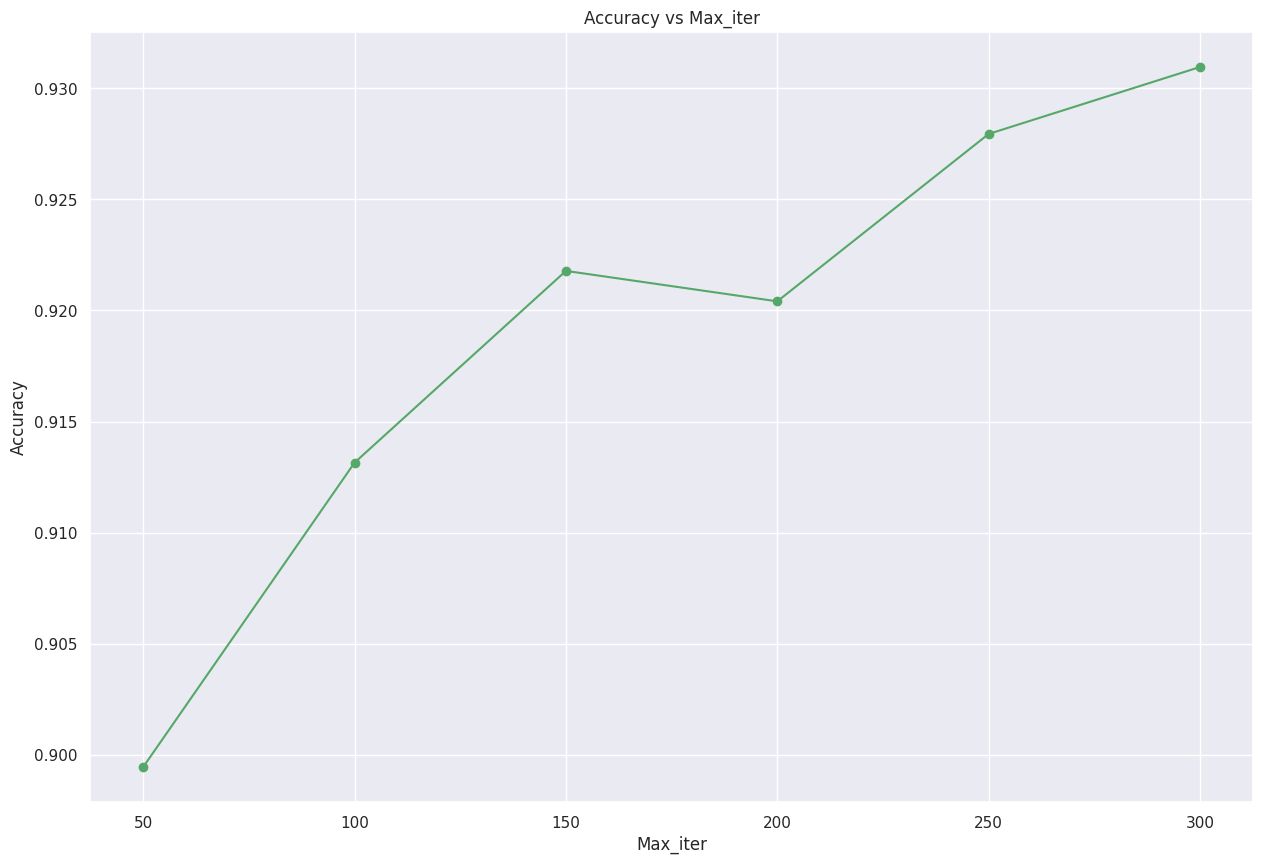

In [507]:
# Plot Accuracy vs Max_iter
plt.figure(figsize=(15, 10))
plt.plot(max_iters, iter_accuracies, marker='o', linestyle='-', color='g')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max_iter')
plt.grid(True)
plt.show()

#Assignment----3

##Target Variable Injury Type

###Apply Decision Tree

####Train the Decision Tree Model on the train set

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the parameter grid - Remove 'classifier__' prefix
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for split quality
    'max_depth': [10, 50, 100],  # Depth of the tree
    'min_samples_split': [2, 5, 10, 20, 25],
}

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=39)

# Set up the grid search
dt_model = GridSearchCV(dt_model, param_grid, cv=5, verbose=2, n_jobs=-1)

dt_model.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=39), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'min_samples_split': [2, 5, 10, 20, 25]},
             verbose=2)

In [ ]:
print("Best Parameters:", dt_model.best_params_)
best_model = dt_model.best_estimator_

# Evaluate on the test set
y_pred = dt_model.predict(x_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 25}
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94      5645
         1.0       0.83      0.57      0.68      1034
         2.0       0.65      0.47      0.55       118
         3.0       0.97      0.52      0.67        58
         4.0       0.89      0.55      0.68       445

    accuracy                           0.89      7300
   macro avg       0.85      0.62      0.70      7300
weighted avg       0.88      0.89      0.88      7300



In [ ]:
# dt_model.score(x_test, y_test)

####Test the trained model on the test set

In [508]:
predicted_result3 = dt_model.predict(x_test)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [509]:
accuracy3 = accuracy_score(y_test, predicted_result3)
print(f'Accuracy3: {accuracy3:.2f}')


Accuracy3: 0.89


#####b. Confusion Matrix

In [ ]:
conf_matrix3 = confusion_matrix(y_test, predicted_result3)
print('Confusion Matrix3:')
print(conf_matrix3)


Confusion Matrix3:
[[5549   79    7    0   10]
 [ 429  587    3    0   15]
 [  50    9   56    1    2]
 [  24    1    1   30    2]
 [ 152   29   19    0  245]]


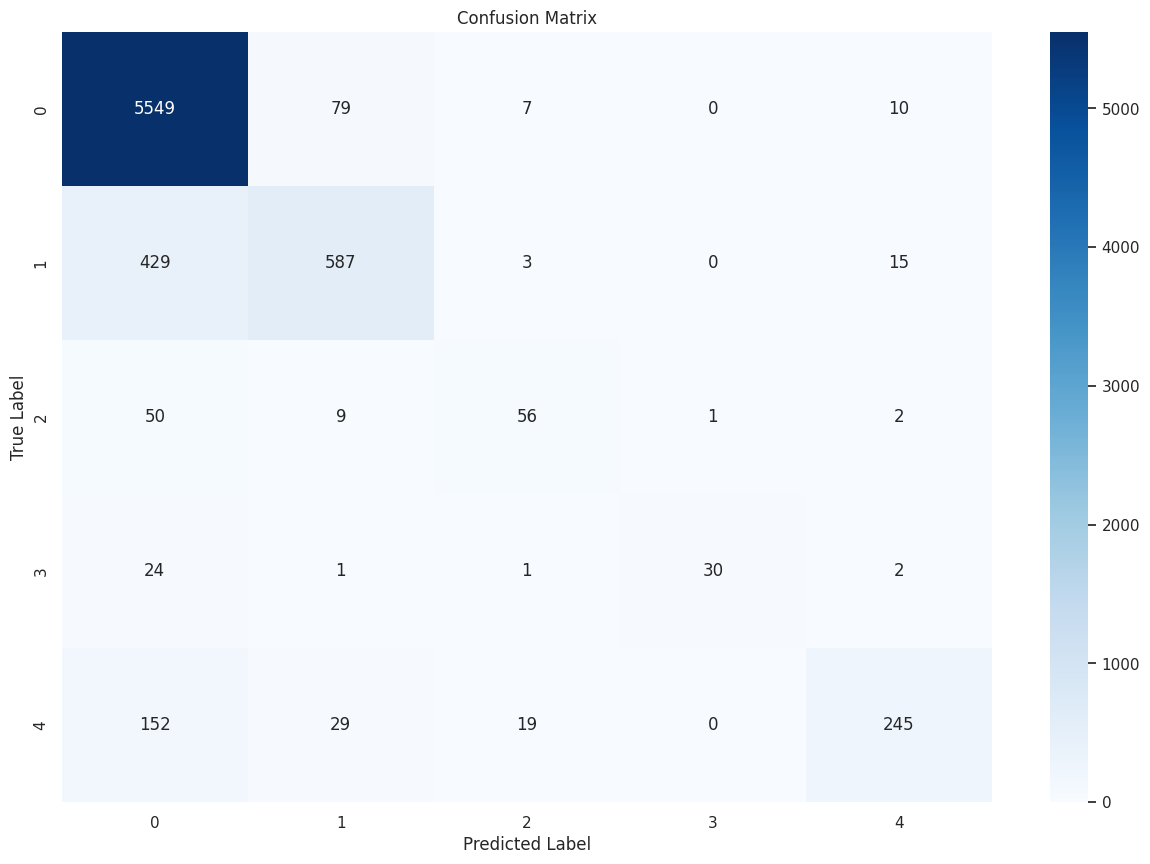

In [510]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true labels
cm = confusion_matrix(y_test, predicted_result3)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#####c. Precision

In [511]:
precision3 = precision_score(y_test, predicted_result3, average='weighted')
print(f'Precision3: {precision3:.2f}')


Precision3: 0.88


#####d. Recall

In [512]:
recall3 = recall_score(y_test, predicted_result3, average='weighted')
print(f'Recall3: {recall3:.2f}')


Recall3: 0.89


#####e. F1 Score

In [513]:
IT_f1 = f1_score(y_test, predicted_result3, average='weighted')
print(f'F1 Score: {IT_f1:.2f}')


F1 Score: 0.88


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-514-ae1b431924d1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


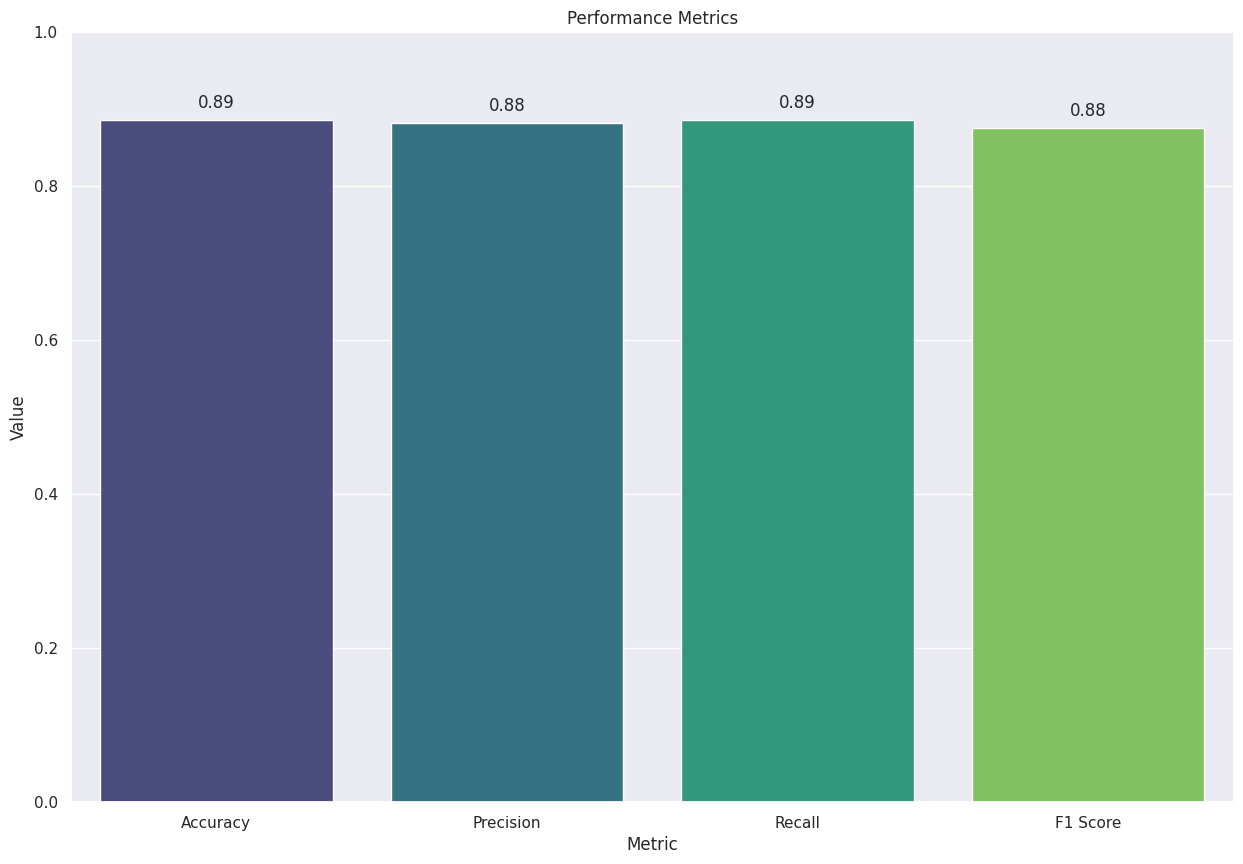

In [514]:
# Plot Accuracy, Precision, Recall, F1 Score metrics
metrics = {'Accuracy': accuracy3, 'Precision': precision3, 'Recall': recall3, 'F1 Score': IT_f1}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

####Accuracy (y-axis) VS Max_depth (x-axis) Graph Plot

In [515]:
max_depth_values = [4, 5, 6, 7, 8, 9]

# List to store accuracy values
accuracy_values = []

# Train and test the Decision Tree for each max_depth
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_values.append(accuracy_score(y_test, y_pred))

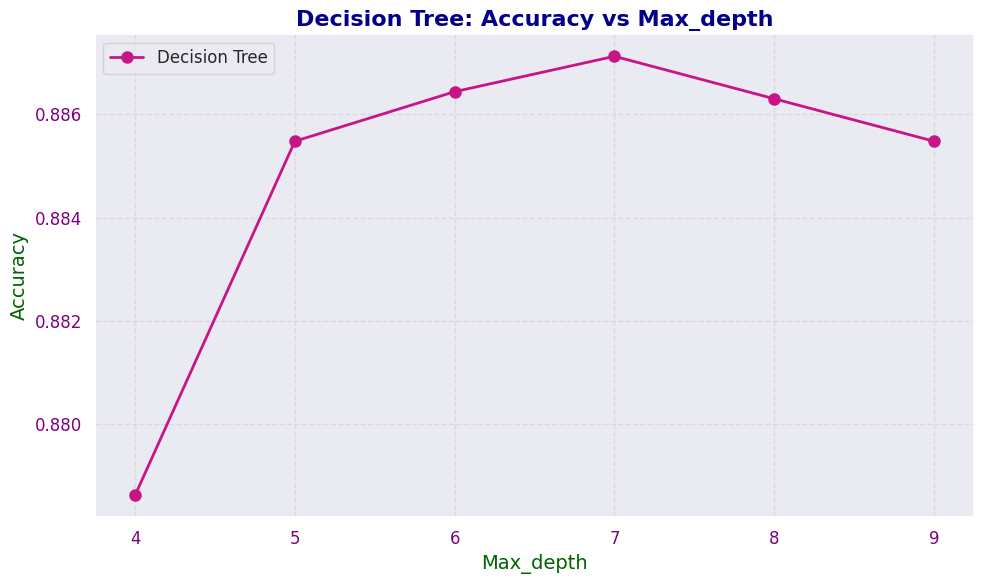

In [516]:
# Stylish Plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_values, marker='o', color='mediumvioletred', linestyle='-', linewidth=2, markersize=8, label='Decision Tree')
plt.title("Decision Tree: Accuracy vs Max_depth", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Max_depth", fontsize=14, color='darkgreen')
plt.ylabel("Accuracy", fontsize=14, color='darkgreen')
plt.xticks(max_depth_values, fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')
plt.grid(True, linestyle='--', color='lightgrey', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

###Apply Support Vector Machine (SVM)

####Feature Scaling (For SVM)

In [518]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

####Train the SVM Model on the test set

In [519]:
from sklearn.svm import SVC

In [520]:
svm_model = SVC(random_state=39)

svm_model.fit(x_train_scaled, y_train)

SVC(random_state=39)

In [521]:
svm_model.score(x_train_scaled, y_train)

0.8742679042367366

In [522]:
svm_model.score(x_test_scaled, y_test)

0.8657534246575342

####Test the trained model on the test set

In [523]:
predicted_result4 = svm_model.predict(x_test_scaled)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [524]:
accuracy4 = accuracy_score(y_test, predicted_result4)
print(f'Accuracy4: {accuracy4:.2f}')


Accuracy4: 0.87


#####b. Confusion Matrix

In [525]:
conf_matrix4 = confusion_matrix(y_test, predicted_result4)
print('Confusion Matrix4:')
print(conf_matrix4)


Confusion Matrix4:
[[5526  118    0    0    1]
 [ 473  556    1    0    4]
 [  38   63   10    0    7]
 [  22    6    2    0   28]
 [ 132   74   10    1  228]]


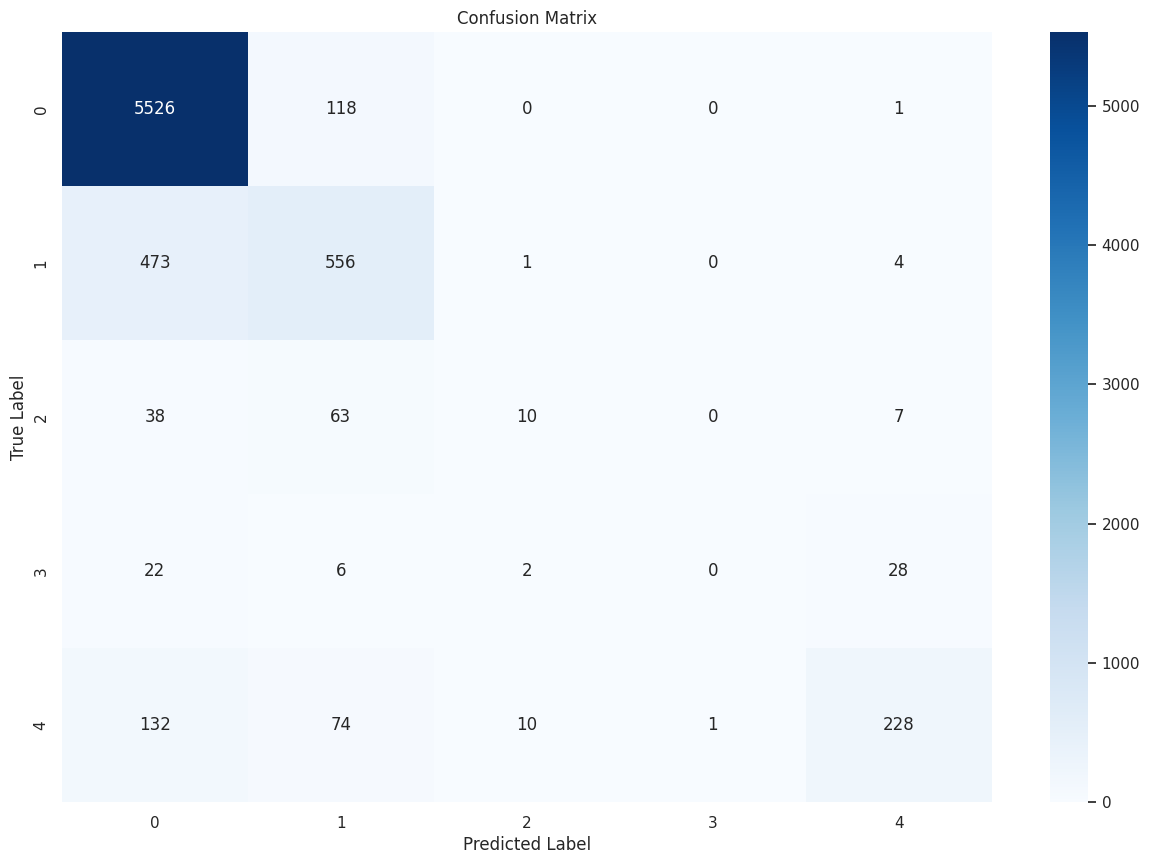

In [526]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true labels
cm = confusion_matrix(y_test, predicted_result4)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#####c. Precision

In [527]:
precision4 = precision_score(y_test, predicted_result4, average='weighted')
print(f'Precision3: {precision4:.2f}')


Precision3: 0.85


#####d. Recall

In [528]:
recall4 = recall_score(y_test, predicted_result4, average='weighted')
print(f'Recall3: {recall4:.2f}')


Recall3: 0.87


#####e. F1 Score

In [529]:
IT2_f1 = f1_score(y_test, predicted_result4, average='weighted')
print(f'F1 Score: {IT2_f1:.2f}')


F1 Score: 0.85


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-530-c8f32663c37e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


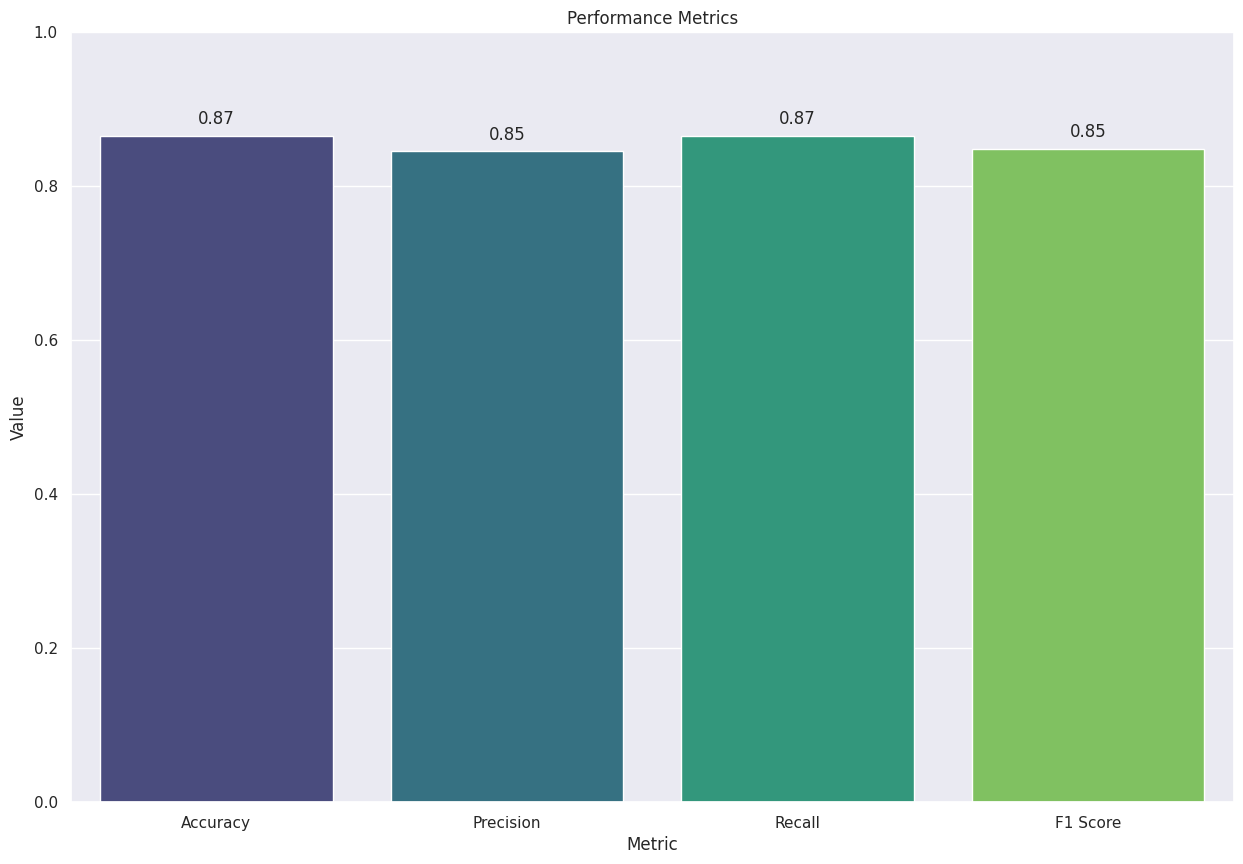

In [530]:
# Plot Accuracy, Precision, Recall, F1 Score metrics
metrics = {'Accuracy': accuracy4, 'Precision': precision4, 'Recall': recall4, 'F1 Score': IT2_f1}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

####Accuracy (y-axis) VS Kernel (x-axis) Graph Plot

In [531]:
# List of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# List to store accuracy values
svm_accuracy_values = []

# Train and test the SVM for each kernel
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    svm_accuracy_values.append(accuracy_score(y_test, y_pred))

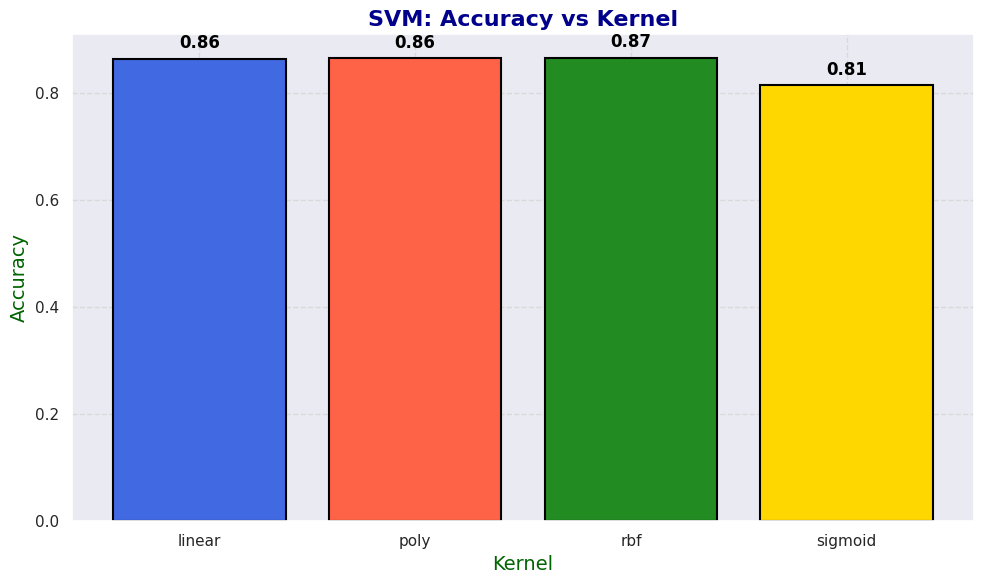

In [532]:
# Stylish Bar Plot for SVM
plt.figure(figsize=(10, 6))
colors = ['royalblue', 'tomato', 'forestgreen', 'gold']  # Color palette for each kernel
bars = plt.bar(kernels, svm_accuracy_values, color=colors, edgecolor='black', linewidth=1.5)

# Adding labels and title
plt.title("SVM: Accuracy vs Kernel", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Kernel", fontsize=14, color='darkgreen')
plt.ylabel("Accuracy", fontsize=14, color='darkgreen')

# Adding gridlines
plt.grid(True, linestyle='--', color='lightgrey', alpha=0.7)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

###Comparison table for the performance of all the *models*

In [533]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy, accuracy3, accuracy4],
    'Precision': [precision, precision3, precision4],
    'Recall': [recall, recall3, recall4],
    'F1 Score': [f1, IT_f1, IT2_f1]
}

com_df = pd.DataFrame(data)

In [534]:
# Function to apply color gradients for numeric values
def highlight_gradient(val):
    if isinstance(val, (int, float)):
        return f'background-color: rgba(0, 128, 0, {val / 1.0}); color: white;'  # Green gradient with white text
    else:
        return ''

# Function to highlight the best values in each column with bold and color
def highlight_max_min(s):
    max_value = s.max()
    min_value = s.min()
    return [
        'background-color: lightgreen; color: black; font-weight: bold;' if v == max_value else
        'background-color: lightcoral; color: black; font-weight: bold;' if v == min_value else '' for v in s
    ]

# Apply the styling to the DataFrame with a colorful scheme
com_table = com_df.style \
    .apply(highlight_max_min, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'], axis=0) \
    .applymap(highlight_gradient) \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', 'dodgerblue'),  # Header color
                  ('color', 'white'),
                  ('font-size', '22px'),
                  ('text-align', 'center'),
                  ('padding', '10px')]
    }, {
        'selector': 'tbody th',
        'props': [('background-color', 'mediumpurple'),  # Model names color
                  ('color', 'white'),
                  ('font-size', '20px'),
                  ('text-align', 'center'),
                  ('padding', '10px')]
    }, {
        'selector': 'tbody td',
        'props': [('font-size', '18px'),
                  ('text-align', 'center'),
                  ('padding', '10px'),
                  ('border', '1px solid black')]  # Border for cells
    }, {
        'selector': 'table',
        'props': [('border', '3px solid black'),  # Thick border for table
                  ('border-collapse', 'collapse'),
                  ('width', '90%'),
                  ('margin', 'auto')]
    }]) \
    .set_caption("Model Performance Metrics") \
    .hide(axis="index")  # Hide the index for a cleaner look

# Display the styled table
com_table


<ipython-input-534-8d298a0ef207>:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_gradient) \


##Target Variable Patient_Status

In [535]:
x4 = df.drop(columns=['Patient_Status_Ordinal'])

y4 = df['Patient_Status_Ordinal']

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=39)

print("x_train shape:", x4_train.shape)
print("x_test shape:", x4_test.shape)
print("y_train shape:", y4_train.shape)
print("y_test shape:", y4_test.shape)

x_train shape: (29197, 22)
x_test shape: (7300, 22)
y_train shape: (29197,)
y_test shape: (7300,)


###Apply Decision Tree

####Train the Decision Tree Model on the train set

In [536]:
dt_model = DecisionTreeClassifier(random_state=39)

dt_model.fit(x2_train, y2_train)

DecisionTreeClassifier(random_state=39)

In [537]:
dt_model.score(x2_train, y2_train)

1.0

In [538]:
dt_model.score(x2_test, y2_test)

0.9826027397260274

####Test the trained model on the test set

In [539]:
predicted_result5 = dt_model.predict(x2_test)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [540]:
accuracy5 = accuracy_score(y2_test, predicted_result5)
print(f'Accuracy5: {accuracy5:.2f}')

Accuracy5: 0.98


#####b. Confusion Matrix

In [541]:
conf_matrix5 = confusion_matrix(y2_test, predicted_result5)
print('Confusion Matrix5:')
print(conf_matrix5)

Confusion Matrix5:
[[3330   25   38]
 [  16 3818    6]
 [  40    2   25]]


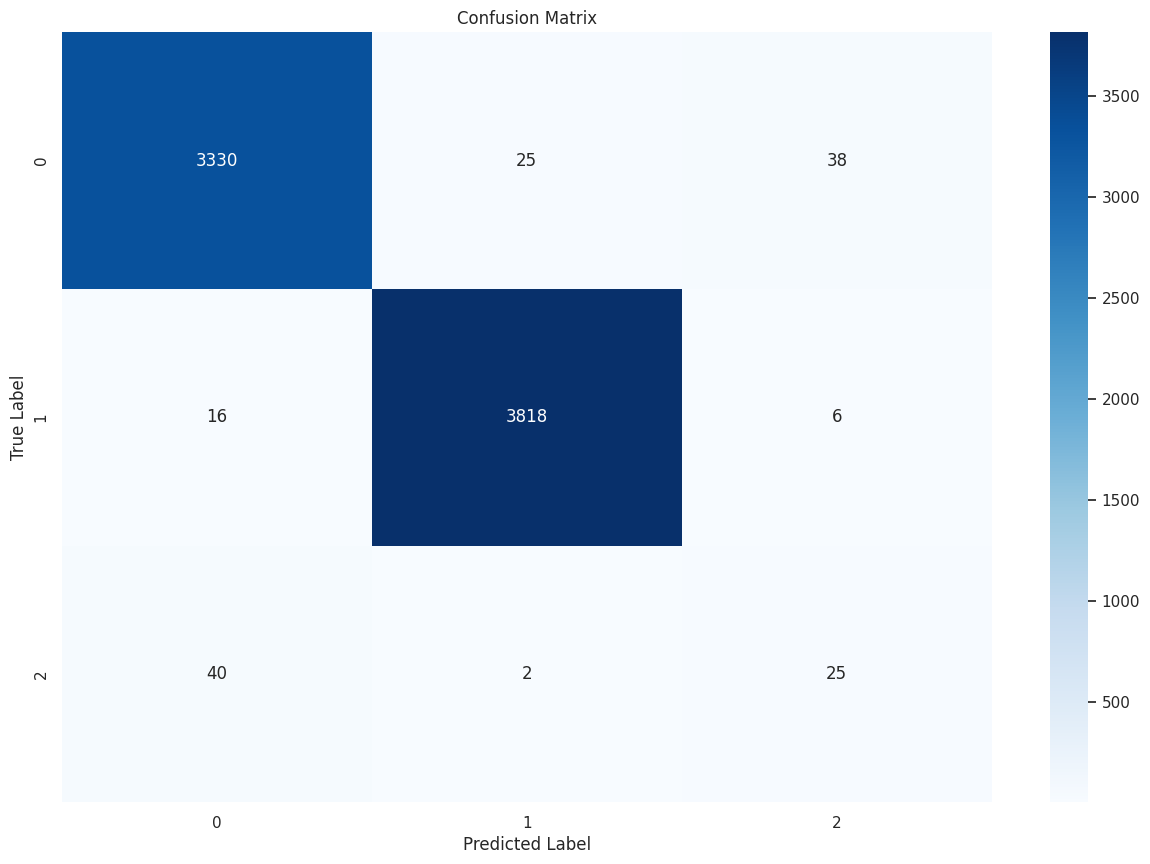

In [542]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true labels
cm = confusion_matrix(y2_test, predicted_result5)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#####c. Precision

In [543]:
precision5 = precision_score(y2_test, predicted_result5, average='weighted')
print(f'Precision5: {precision5:.2f}')

Precision5: 0.98


#####c. Recall

In [544]:
recall5 = recall_score(y2_test, predicted_result5, average='weighted')
print(f'Recall5: {recall5:.2f}')

Recall5: 0.98


#####e. F1 Score

In [545]:
PS_f1 = f1_score(y2_test, predicted_result5, average='weighted')
print(f'F1 Score: {PS_f1:.2f}')


F1 Score: 0.98


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-546-08f873a785ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


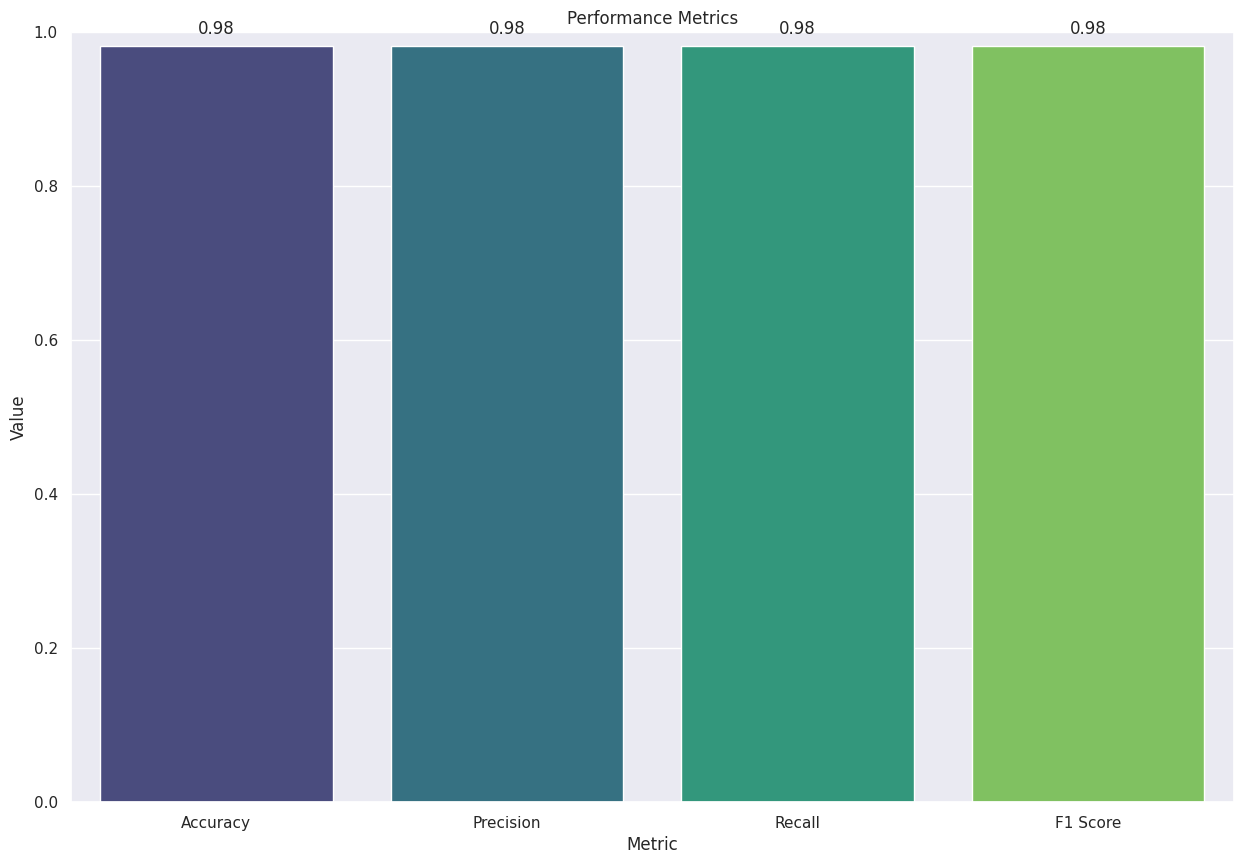

In [546]:
# Plot Accuracy, Precision, Recall, F1 Score metrics
metrics = {'Accuracy': accuracy5, 'Precision': precision5, 'Recall': recall5, 'F1 Score': PS_f1}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

####Accuracy (y-axis) VS Max_depth (x-axis) Plot Graph

In [547]:
max_depth_values = [4, 5, 6, 7, 8, 9]

# List to store accuracy values
accuracy_values = []

# Train and test the Decision Tree for each max_depth
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(x2_train, y2_train)
    y2_pred = model.predict(x2_test)
    accuracy_values.append(accuracy_score(y2_test, y2_pred))

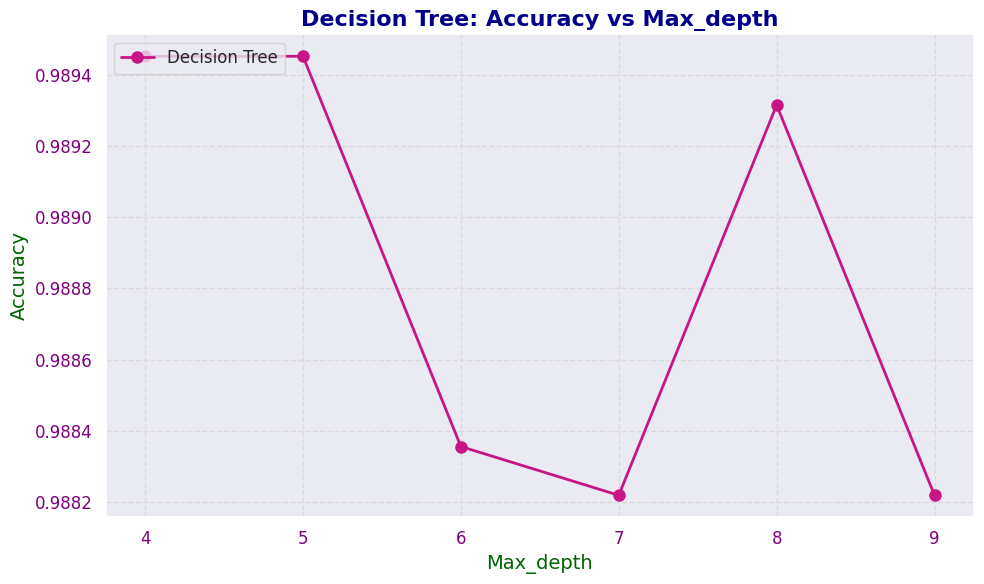

In [548]:
# Stylish Plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_values, marker='o', color='mediumvioletred', linestyle='-', linewidth=2, markersize=8, label='Decision Tree')
plt.title("Decision Tree: Accuracy vs Max_depth", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Max_depth", fontsize=14, color='darkgreen')
plt.ylabel("Accuracy", fontsize=14, color='darkgreen')
plt.xticks(max_depth_values, fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')
plt.grid(True, linestyle='--', color='lightgrey', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

###Apply Support Vector Machine (SVM)

####Feature Scaling (For SVM)

In [549]:
x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)

####Train the SVM Model on the test set

In [550]:
from sklearn.svm import SVC

In [551]:
svm_model = SVC(random_state=40)

svm_model.fit(x2_train, y2_train)

SVC(random_state=40)

In [552]:
svm_model.score(x2_train, y2_train)

0.9603041408363873

In [553]:
svm_model.score(x2_test, y2_test)

0.9552054794520548

####Test the trained model on the test set

In [554]:
predicted_result6 = svm_model.predict(x2_test)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [555]:
accuracy6 = accuracy_score(y2_test, predicted_result6)
print(f'Accuracy6: {accuracy6:.2f}')


Accuracy6: 0.96


#####b. Confusion Matrix

In [556]:
conf_matrix6 = confusion_matrix(y2_test, predicted_result6)
print('Confusion Matrix6:')
print(conf_matrix6)


Confusion Matrix6:
[[3134  259    0]
 [   1 3839    0]
 [  57   10    0]]


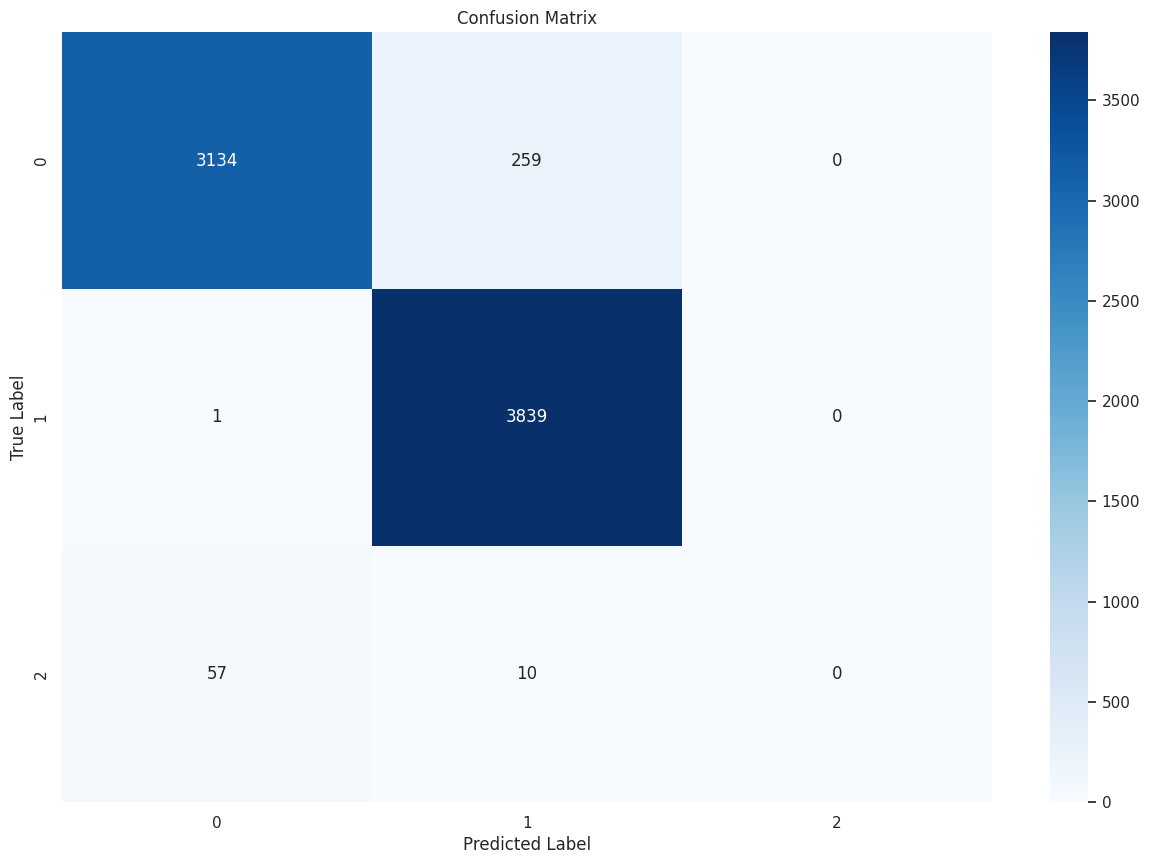

In [557]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is the true labels
cm = confusion_matrix(y2_test, predicted_result6)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#####c. Precision

In [558]:
precision6 = precision_score(y2_test, predicted_result6, average='weighted')
print(f'Precision6: {precision6:.2f}')


Precision6: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#####d. Recall

In [559]:
recall6 = recall_score(y2_test, predicted_result6, average='weighted')
print(f'Recall6: {recall6:.2f}')


Recall6: 0.96


#####e. F1 Score

In [560]:
PS2_f1 = f1_score(y2_test, predicted_result6, average='weighted')
print(f'F1 Score: {PS2_f1:.2f}')


F1 Score: 0.95


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-561-cafa60466604>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


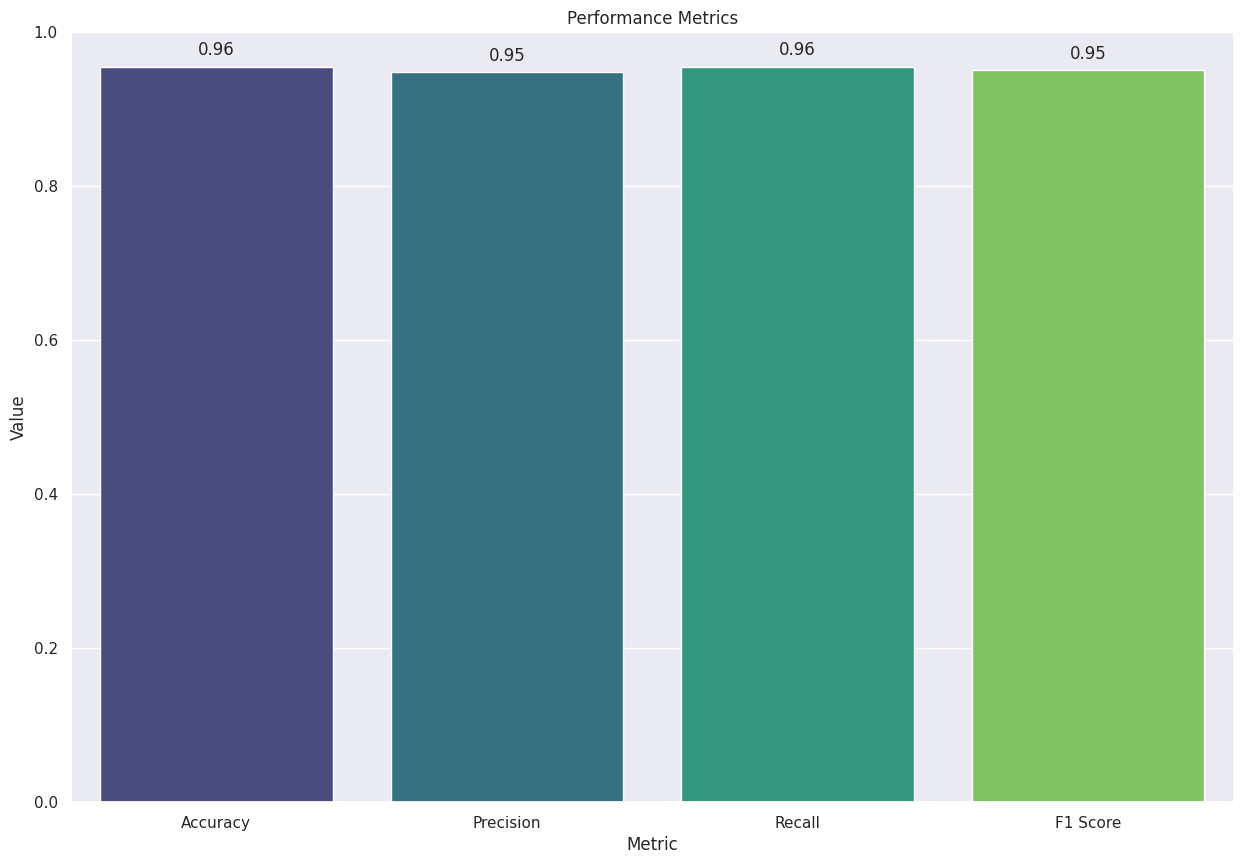

In [561]:
# Plot Accuracy, Precision, Recall, F1 Score metrics
metrics = {'Accuracy': accuracy6, 'Precision': precision6, 'Recall': recall6, 'F1 Score': PS2_f1}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

####Accuracy (y-axis) VS Kernel (x-axis) Graph Plot

In [562]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# List to store accuracy values
svm_accuracy_values = []

# Train and test the SVM for each kernel
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(x2_train_scaled, y2_train)
    y2_pred = model.predict(x2_test_scaled)
    svm_accuracy_values.append(accuracy_score(y2_test, y2_pred))

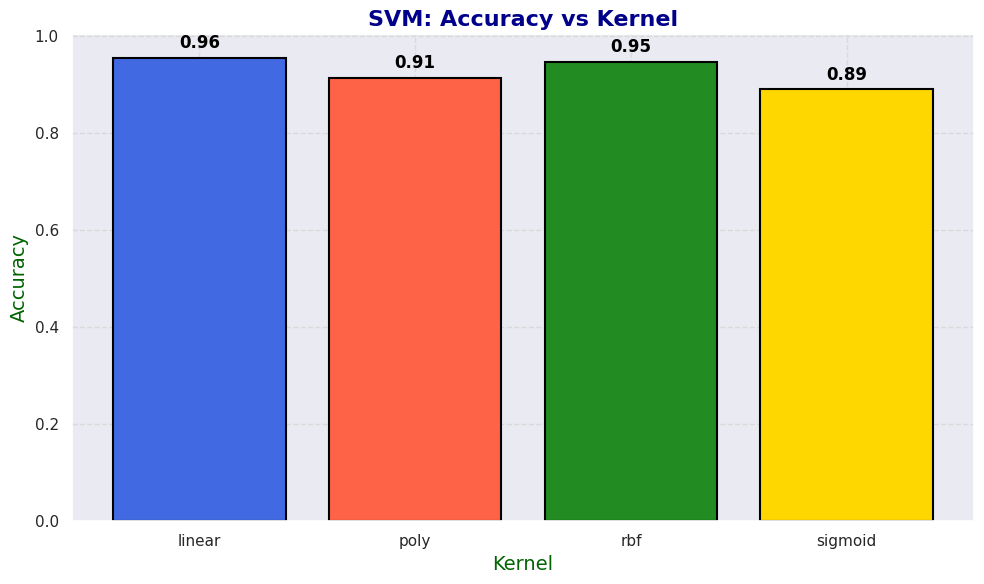

In [563]:
# Stylish Bar Plot for SVM
plt.figure(figsize=(10, 6))
colors = ['royalblue', 'tomato', 'forestgreen', 'gold']  # Color palette for each kernel
bars = plt.bar(kernels, svm_accuracy_values, color=colors, edgecolor='black', linewidth=1.5)

# Adding labels and title
plt.title("SVM: Accuracy vs Kernel", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Kernel", fontsize=14, color='darkgreen')
plt.ylabel("Accuracy", fontsize=14, color='darkgreen')

# Adding gridlines
plt.grid(True, linestyle='--', color='lightgrey', alpha=0.7)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

###Comparison table for the performance of all the *models*

In [564]:
data2 = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy2, accuracy5, accuracy6],
    'Precision': [precision2, precision5, precision6],
    'Recall': [recall2, recall5, recall6],
    'F1 Score': [Psf1, PS_f1, PS2_f1]
}

com_df = pd.DataFrame(data2)

In [565]:
# Function to apply color gradients for numeric values
def highlight_gradient(val):
    if isinstance(val, (int, float)):
        return f'background-color: rgba(0, 128, 0, {val / 1.0}); color: white;'  # Green gradient with white text
    else:
        return ''

# Function to highlight the best values in each column with bold and color
def highlight_max_min(s):
    max_value = s.max()
    min_value = s.min()
    return [
        'background-color: lightgreen; color: black; font-weight: bold;' if v == max_value else
        'background-color: lightcoral; color: black; font-weight: bold;' if v == min_value else '' for v in s
    ]

# Apply the styling to the DataFrame with a colorful scheme
com_table = com_df.style \
    .apply(highlight_max_min, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'], axis=0) \
    .applymap(highlight_gradient) \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', 'dodgerblue'),  # Header color
                  ('color', 'white'),
                  ('font-size', '22px'),
                  ('text-align', 'center'),
                  ('padding', '10px')]
    }, {
        'selector': 'tbody th',
        'props': [('background-color', 'mediumpurple'),  # Model names color
                  ('color', 'white'),
                  ('font-size', '20px'),
                  ('text-align', 'center'),
                  ('padding', '10px')]
    }, {
        'selector': 'tbody td',
        'props': [('font-size', '18px'),
                  ('text-align', 'center'),
                  ('padding', '10px'),
                  ('border', '1px solid black')]  # Border for cells
    }, {
        'selector': 'table',
        'props': [('border', '3px solid black'),  # Thick border for table
                  ('border-collapse', 'collapse'),
                  ('width', '90%'),
                  ('margin', 'auto')]
    }]) \
    .set_caption("Model Performance Metrics") \
    .hide(axis="index")  # Hide the index for a cleaner look

# Display the styled table
com_table


<ipython-input-565-8d298a0ef207>:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_gradient) \


#Assignment----4

##Target Variable Injury Type

###Apply Random Forest

####Train the Random Forest Model on the test set

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=39)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the parameter grid - Remove 'classifier__' prefix
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Criterion for split quality
    'max_depth': [10, 50, None],  # Depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],
}

# Initialize the model


# Set up the grid search
rf_model = GridSearchCV(rf_model, param_grid, cv=5, verbose=2, n_jobs=-1)


rf_model.fit(x_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=39), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
rf_model.score(x_train, y_train)

0.9054012398534096

In [ ]:
rf_model.score(x_test, y_test)

0.89

####Test the trained model on the test set

In [ ]:
predicted_result_rf7 = rf_model.predict(x_test)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [ ]:
accuracy_rf7 = accuracy_score(y_test, predicted_result_rf7)
print(f'Accuracy_rf: {accuracy_rf7:.2f}')

Accuracy_rf: 0.89


#####b. Confusion Matrix

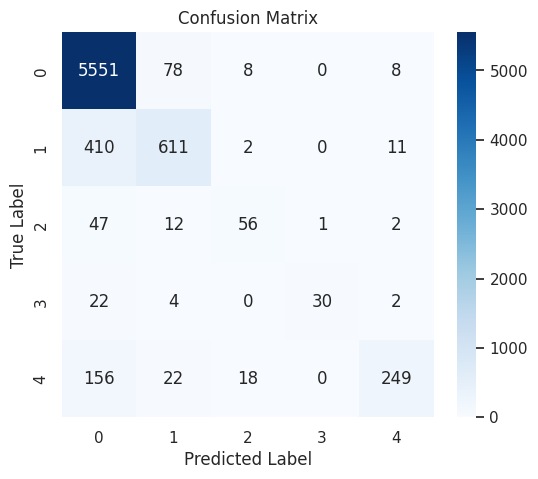

In [ ]:
cm = confusion_matrix(y_test, predicted_result_rf7)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#####c. Precision

In [ ]:
precision7 = precision_score(y_test, predicted_result_rf7, average='weighted')
print(f'Precision7: {precision7:.2f}')

Precision7: 0.89


#####d. Recall

In [ ]:
recall7 = recall_score(y_test, predicted_result_rf7, average='weighted')
print(f'Recall7: {recall7:.2f}')

Recall7: 0.89


#####e. F1 Score

In [ ]:
IT_f1_7 = f1_score(y_test, predicted_result_rf7, average='weighted')
print(f'F1 Score: {IT_f1_7:.2f}')

F1 Score: 0.88


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-282-7606ffd77fe5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


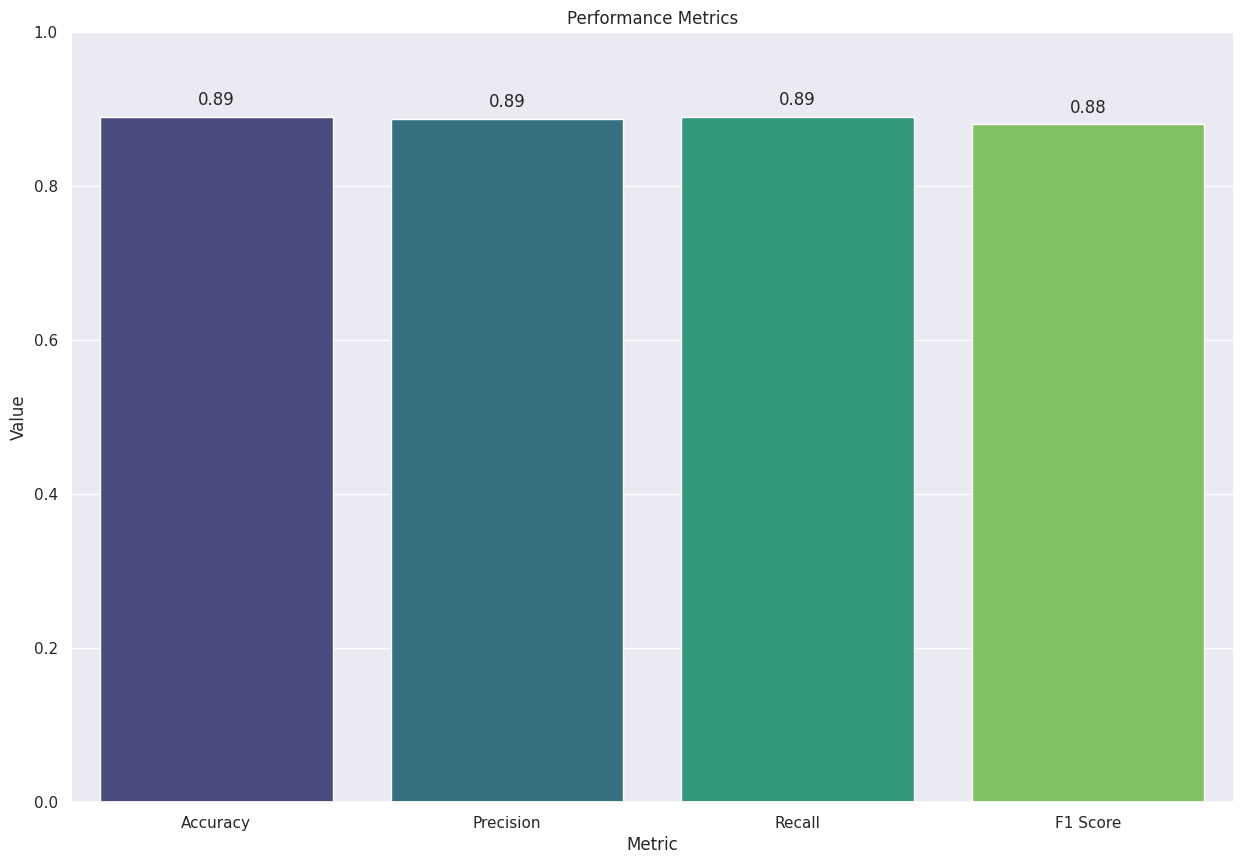

In [ ]:
metrics = {'Accuracy': accuracy_rf7, 'Precision': precision7, 'Recall': recall7, 'F1 Score': IT_f1_7}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

###Apply XGBoost

####Train the XGBoost Model on the test set

In [ ]:
from xgboost import XGBClassifier

In [ ]:

from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.5, 1, 5],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [1, 2]
}

# Use the GPU-accelerated XGBoost
xg_model = XGBClassifier( random_state=42)

# Set up RandomizedSearchCV with 30 iterations and 3-fold cross-validation
xg_model = RandomizedSearchCV(
    estimator=xg_model,
    param_distributions=param_dist,
    n_iter=30,  # Increase the number of iterations for better exploration
    cv=3,  # Cross-validation with 3 folds
    scoring='accuracy',  # Use accuracy or another metric (e.g., F1, ROC-AUC)
    verbose=2,  # Show progress of the search
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
xg_model.fit(x_train, y_train)



Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:52:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.5, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 150, 200, 250],
                                        'scale_pos_weight': [1, 2],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
xg_model.score(x_train, y_train)

0.9084152481419324

In [ ]:
xg_model.score(x_test, y_test)

0.8905479452054794

####Test the trained model on the test set

In [ ]:
predicted_result_xg8 = xg_model.predict(x_test)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [ ]:
accuracy_xg8 = accuracy_score(y_test, predicted_result_xg8)
print(f'Accuracy_xg: {accuracy_xg8:.2f}')

Accuracy_xg: 0.89


#####b. Confusion Matrix

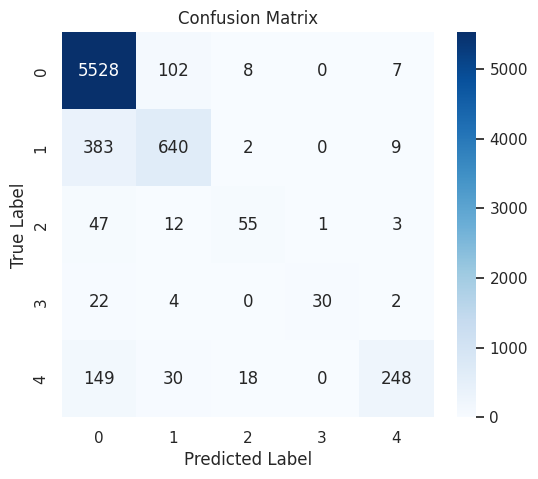

In [ ]:
cm = confusion_matrix(y_test, predicted_result_xg8)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#####c. Precision

In [ ]:
precision8 = precision_score(y_test, predicted_result_xg8, average='weighted')
print(f'Precision8: {precision8:.2f}')

Precision8: 0.89


#####d. Recall

In [ ]:
recall8 = recall_score(y_test, predicted_result_xg8, average='weighted')
print(f'Recall8: {recall8:.2f}')

Recall8: 0.89


#####e. F1 Score

In [ ]:
IT_f1_8 = f1_score(y_test, predicted_result_xg8, average='weighted')
print(f'F1 Score: {IT_f1_8:.2f}')

F1 Score: 0.88


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-329-35db26f00fcd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


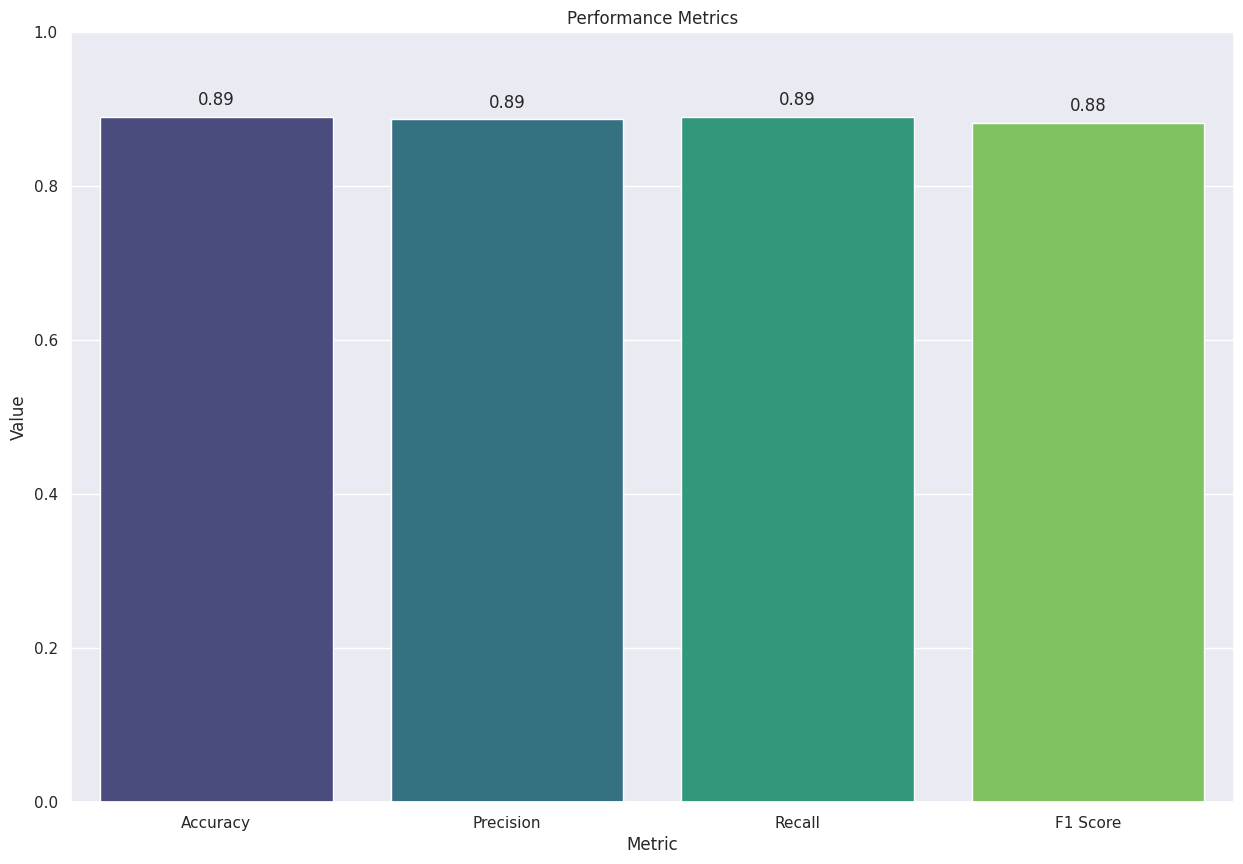

In [ ]:
metrics = {'Accuracy': accuracy_xg8, 'Precision': precision8, 'Recall': recall8, 'F1 Score': IT_f1_8}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

###Apply AdaBoost

####Train the AdaBoost Model on the test set

In [566]:
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [567]:
base_estimator = DecisionTreeClassifier(max_depth=1)


ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=42
)

ada_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [568]:
ada_model.score(x_train, y_train)

0.8903996985991711

In [569]:
ada_model.score(x_test, y_test)

0.8879452054794521

####Test the trained model on the test set

In [570]:
predicted_result_ada9 = ada_model.predict(x_test)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [571]:
accuracy_ada9 = accuracy_score(y_test, predicted_result_ada9)
print(f'Accuracy_ada: {accuracy_ada9:.2f}')

Accuracy_ada: 0.89


#####b. Confusion Matrix

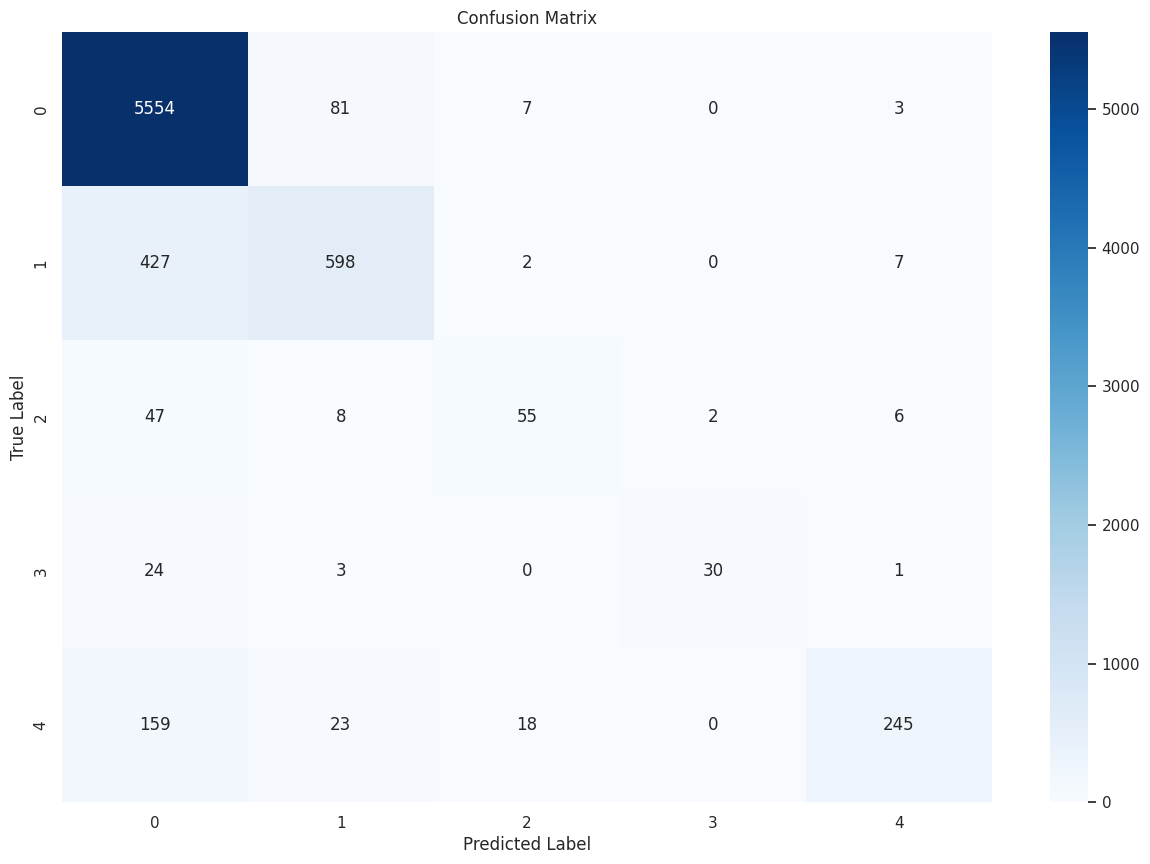

In [572]:
cm = confusion_matrix(y_test, predicted_result_ada9)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#####c. Precision

In [573]:
precision9 = precision_score(y_test, predicted_result_ada9, average='weighted')
print(f'Precision9: {precision9:.2f}')

Precision9: 0.89


#####d. Recall

In [574]:
recall9 = recall_score(y_test, predicted_result_ada9, average='weighted')
print(f'Recall9: {recall9:.2f}')

Recall9: 0.89


#####e. F1 Score

In [575]:
IT_f1_9 = f1_score(y_test, predicted_result_ada9, average='weighted')
print(f'F1 Score: {IT_f1_9:.2f}')

F1 Score: 0.88


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-576-8df6b6d13ab2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


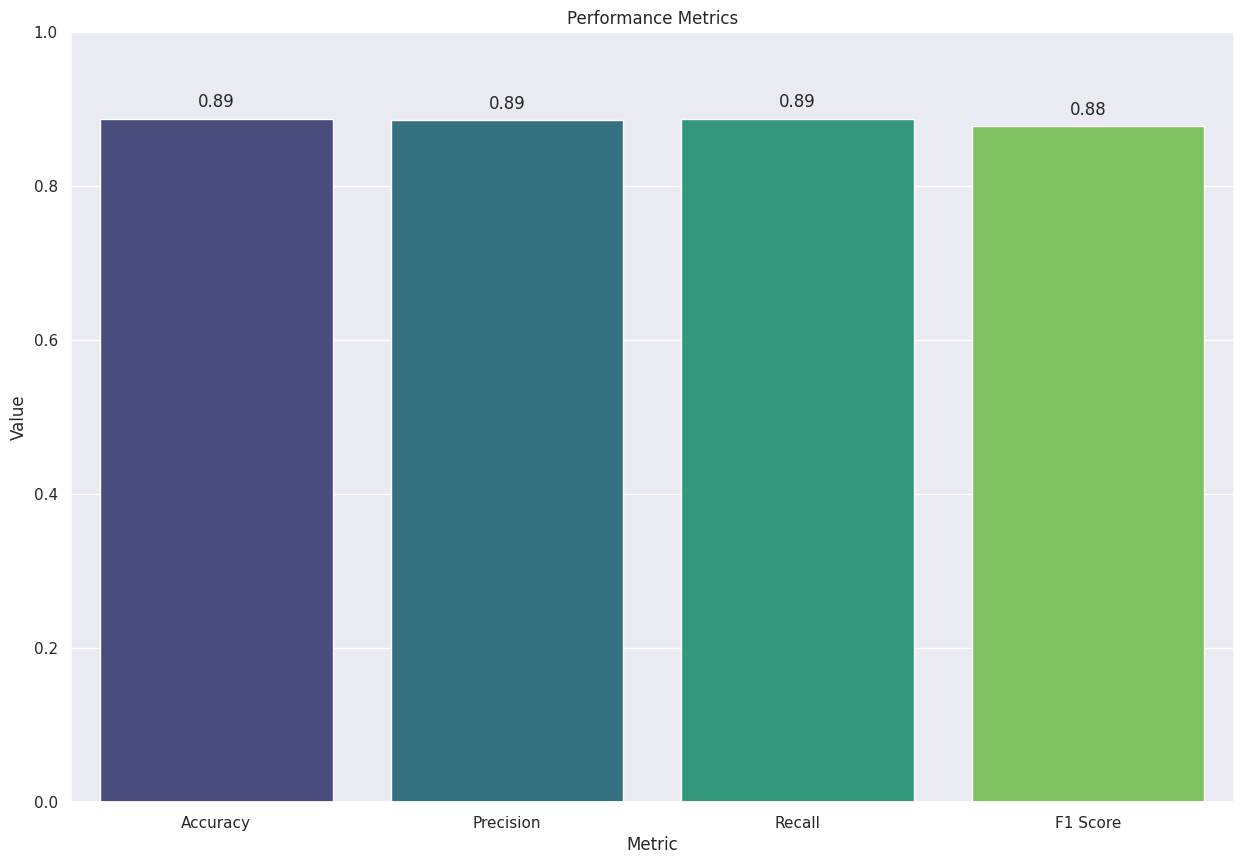

In [576]:
metrics = {'Accuracy': accuracy_ada9, 'Precision': precision9, 'Recall': recall9, 'F1 Score': IT_f1_9}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

###Comparison table for the performance of all the *models*

In [614]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM','Random Forest(HyperTuned)', 'XG Boost(HyperTuned)', 'ADA Boost'],
    'Accuracy': [accuracy, accuracy3, accuracy4, accuracy_rf7,accuracy_xg8, accuracy_ada9],
    'Precision': [precision, precision3, precision4, precision7, precision8, precision9],
    'Recall': [recall, recall3, recall4, recall7, recall8, recall9],
    'F1 Score': [f1, IT_f1, IT2_f1, IT_f1_7, IT_f1_8, IT_f1_9]
}

com_df = pd.DataFrame(data)

In [615]:
# Function to apply color gradients for numeric values
def highlight_gradient(val):
    if isinstance(val, (int, float)):
        return f'background-color: rgba(0, 128, 0, {val / 1.0}); color: white;'  # Green gradient with white text
    else:
        return ''

# Function to highlight the best values in each column with bold and color
def highlight_max_min(s):
    max_value = s.max()
    min_value = s.min()
    return [
        'background-color: lightgreen; color: black; font-weight: bold;' if v == max_value else
        'background-color: lightcoral; color: black; font-weight: bold;' if v == min_value else '' for v in s
    ]

# Apply the styling to the DataFrame with a colorful scheme
com_table = com_df.style \
    .apply(highlight_max_min, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'], axis=0) \
    .applymap(highlight_gradient) \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', 'dodgerblue'),  # Header color
                  ('color', 'white'),
                  ('font-size', '22px'),
                  ('text-align', 'center'),
                  ('padding', '10px')]
    }, {
        'selector': 'tbody th',
        'props': [('background-color', 'mediumpurple'),  # Model names color
                  ('color', 'white'),
                  ('font-size', '20px'),
                  ('text-align', 'center'),
                  ('padding', '10px')]
    }, {
        'selector': 'tbody td',
        'props': [('font-size', '18px'),
                  ('text-align', 'center'),
                  ('padding', '10px'),
                  ('border', '1px solid black')]  # Border for cells
    }, {
        'selector': 'table',
        'props': [('border', '3px solid black'),  # Thick border for table
                  ('border-collapse', 'collapse'),
                  ('width', '90%'),
                  ('margin', 'auto')]
    }]) \
    .set_caption("Model Performance Metrics") \
    .hide(axis="index")  # Hide the index for a cleaner look

# Display the styled table
com_table


<ipython-input-615-8d298a0ef207>:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_gradient) \


##Target Variable Patient_Status

###Apply Random Forest

####Train the Random Forest Model on the test set

In [579]:
from sklearn.ensemble import RandomForestClassifier

In [580]:
rf_model = RandomForestClassifier(random_state=39)

rf_model.fit(x2_train, y2_train)

RandomForestClassifier(random_state=39)

In [581]:
rf_model.score(x2_train, y2_train)

1.0

In [582]:
rf_model.score(x2_test, y2_test)

0.9902739726027397

####Test the trained model on the test set

In [583]:
predicted_result_rf10 = rf_model.predict(x2_test)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [584]:
accuracy_rf10 = accuracy_score(y2_test, predicted_result_rf10)
print(f'Accuracy_rf: {accuracy_rf10:.2f}')

Accuracy_rf: 0.99


#####b. Confusion Matrix

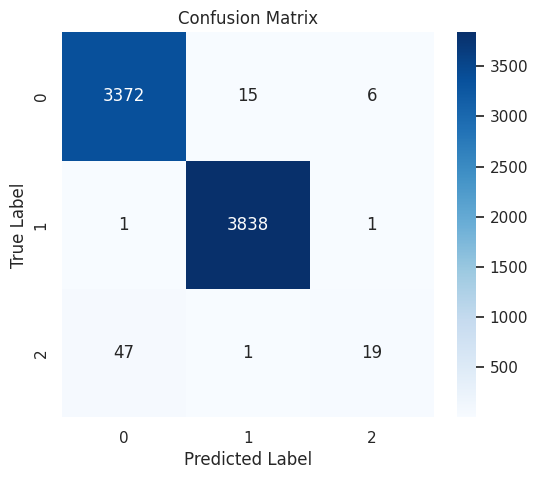

In [585]:
cm = confusion_matrix(y2_test, predicted_result_rf10)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#####c. Precision

In [586]:
precision10 = precision_score(y2_test, predicted_result_rf10, average='weighted')
print(f'Precision10: {precision10:.2f}')

Precision10: 0.99


#####d. Recall

In [587]:
recall10 = recall_score(y2_test, predicted_result_rf10, average='weighted')
print(f'Recall10: {recall10:.2f}')

Recall10: 0.99


#####e. F1 Score

In [588]:
PS_f1_10 = f1_score(y2_test, predicted_result_rf10, average='weighted')
print(f'F1 Score: {PS_f1_10:.2f}')

F1 Score: 0.99


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-589-9c3713ec3ce6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


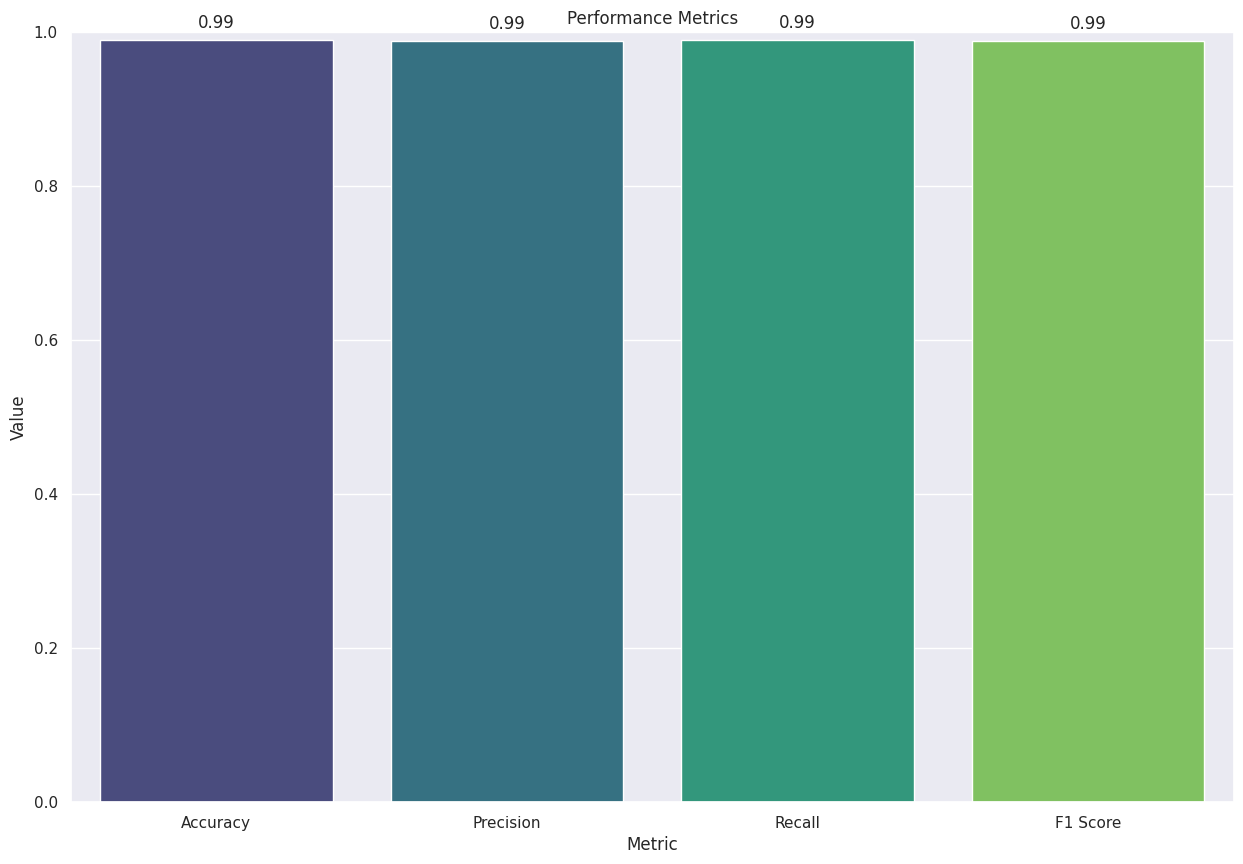

In [589]:
metrics = {'Accuracy': accuracy_rf10, 'Precision': precision10, 'Recall': recall10, 'F1 Score': PS_f1_10}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

###Apply XGBoost

####Train the XGBoost Model on the test set

In [590]:
from xgboost import XGBClassifier

In [591]:
xg_model = XGBClassifier(random_state=39)

xg_model.fit(x2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [592]:
xg_model.score(x2_train, y2_train)

0.9989724971743672

In [593]:
xg_model.score(x2_test, y2_test)

0.989041095890411

####Test the trained model on the test set

In [594]:
predicted_result_xg11 = xg_model.predict(x2_test)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [595]:
accuracy_xg11 = accuracy_score(y2_test, predicted_result_xg11)
print(f'Accuracy_xg11: {accuracy_xg11:.2f}')

Accuracy_xg11: 0.99


#####b. Confusion Matrix

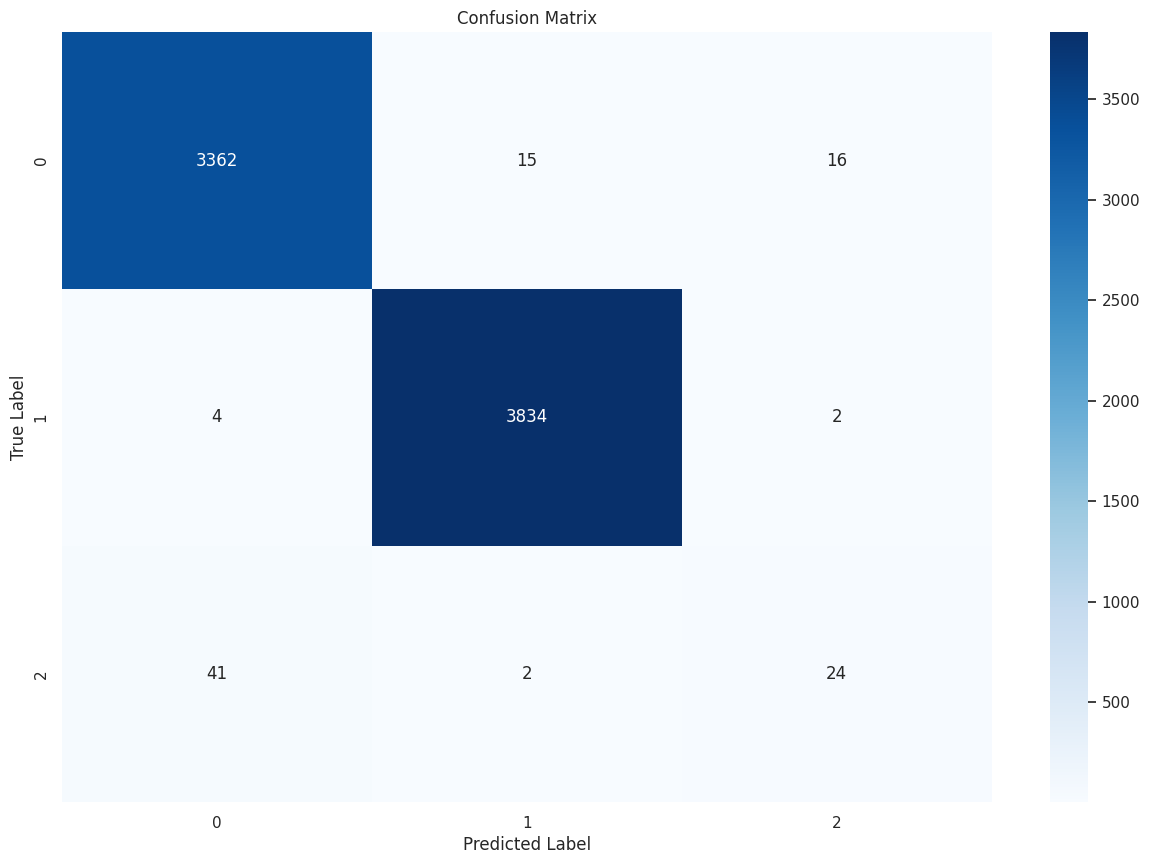

In [596]:
cm = confusion_matrix(y2_test, predicted_result_xg11)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#####c. Precision

In [597]:
precision11 = precision_score(y2_test, predicted_result_xg11, average='weighted')
print(f'Precision11: {precision11:.2f}')

Precision11: 0.99


#####d. Recall

In [598]:
recall11 = recall_score(y2_test, predicted_result_xg11, average='weighted')
print(f'Recall11: {recall11:.2f}')

Recall11: 0.99


#####e. F1 Score

In [599]:
PS_f1_11 = f1_score(y2_test, predicted_result_xg11, average='weighted')
print(f'F1 Score: {PS_f1_11:.2f}')

F1 Score: 0.99


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-600-cb12467f85a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


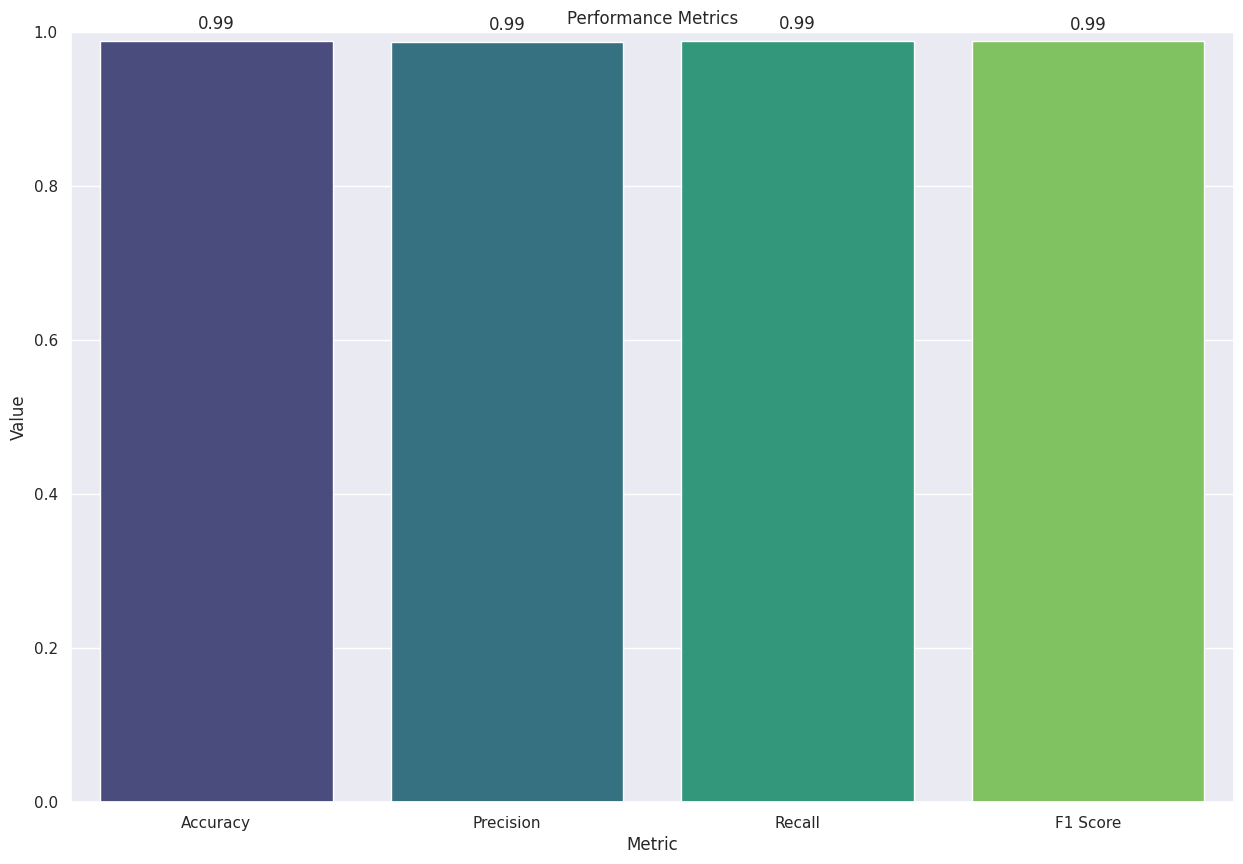

In [600]:
metrics = {'Accuracy': accuracy_xg11, 'Precision': precision11, 'Recall': recall11, 'F1 Score': PS_f1_11}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

###Apply AdaBoost

####Train the AdaBoost Model on the test set

In [601]:
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [602]:
base_estimator = DecisionTreeClassifier(max_depth=1)


ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=42
)

ada_model.fit(x2_train, y2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [603]:
ada_model.score(x2_train, y2_train)

0.9842792067678187

In [604]:
ada_model.score(x2_test, y2_test)

0.9850684931506849

####Test the trained model on the test set

In [605]:
predicted_result_ada12 = ada_model.predict(x2_test)

####Evaluate the performance on the test set using the following metrics:

#####a. Accuracy

In [606]:
accuracy_ada12 = accuracy_score(y2_test, predicted_result_ada12)
print(f'Accuracy_ada12: {accuracy_ada12:.2f}')

Accuracy_ada12: 0.99


#####b. Confusion Matrix

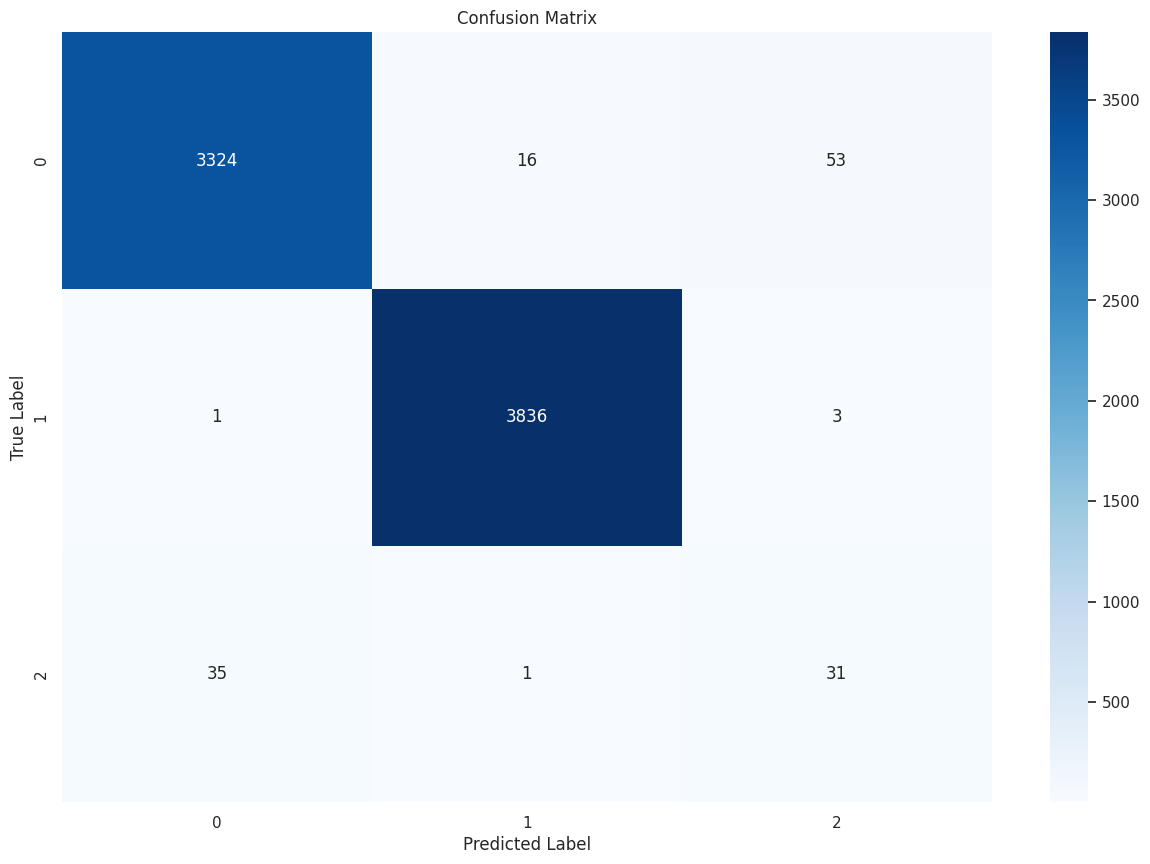

In [607]:
cm = confusion_matrix(y2_test, predicted_result_ada12)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#####c. Precision

In [608]:
precision12 = precision_score(y2_test, predicted_result_ada12, average='weighted')
print(f'Precision12: {precision12:.2f}')

Precision12: 0.99


#####d. Recall

In [609]:
recall12 = recall_score(y2_test, predicted_result_ada12, average='weighted')
print(f'Recall12: {recall12:.2f}')

Recall12: 0.99


#####e. F1 Score

In [610]:
PS_f1_12 = f1_score(y2_test, predicted_result_ada12, average='weighted')
print(f'F1 Score: {PS_f1_12:.2f}')

F1 Score: 0.99


**Plot Accuracy, Precision, Recall, F1 Score metrics**

<ipython-input-611-ea5d73642a4f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


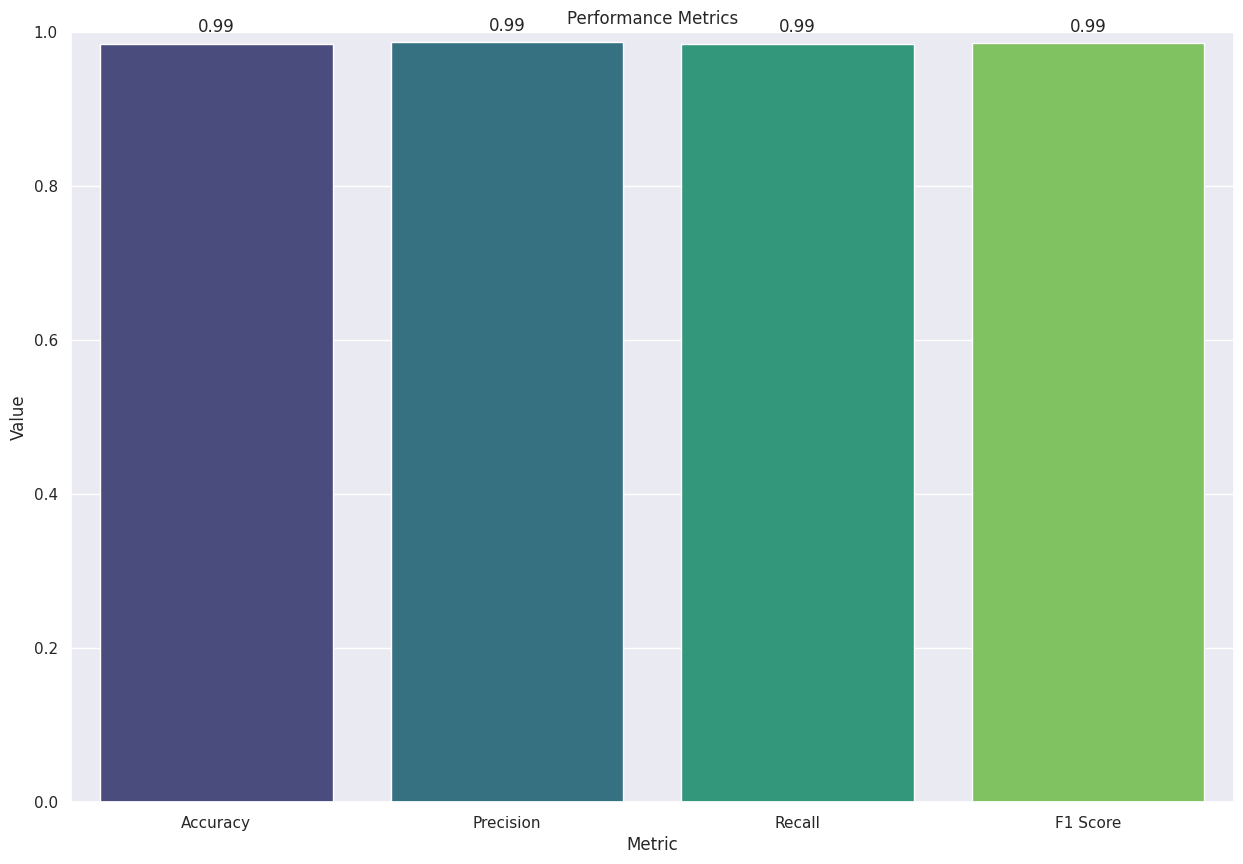

In [611]:
metrics = {'Accuracy': accuracy_ada12, 'Precision': precision12, 'Recall': recall12, 'F1 Score': PS_f1_12}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i in range(metrics_df.shape[0]):
    plt.text(i, metrics_df['Value'][i] + 0.01, f"{metrics_df['Value'][i]:.2f}", ha='center', va='bottom')
plt.show()

###Comparison table for the performance of all the *models*

In [612]:
data2 = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM','Random Forest', 'XG Boost', 'ADA Boost'],
    'Accuracy': [accuracy2, accuracy5, accuracy6, accuracy_rf10, accuracy_xg11, accuracy_ada12],
    'Precision': [precision2, precision5, precision6, precision10, precision11, precision12],
    'Recall': [recall2, recall5, recall6, recall10, recall11, recall12],
    'F1 Score': [Psf1, PS_f1, PS2_f1, PS_f1_10, PS_f1_11, PS_f1_12]
}

com_df = pd.DataFrame(data2)

In [613]:
# Function to apply color gradients for numeric values
def highlight_gradient(val):
    if isinstance(val, (int, float)):
        return f'background-color: rgba(0, 128, 0, {val / 1.0}); color: white;'  # Green gradient with white text
    else:
        return ''

# Function to highlight the best values in each column with bold and color
def highlight_max_min(s):
    max_value = s.max()
    min_value = s.min()
    return [
        'background-color: lightgreen; color: black; font-weight: bold;' if v == max_value else
        'background-color: lightcoral; color: black; font-weight: bold;' if v == min_value else '' for v in s
    ]

# Apply the styling to the DataFrame with a colorful scheme
com_table = com_df.style \
    .apply(highlight_max_min, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'], axis=0) \
    .applymap(highlight_gradient) \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', 'dodgerblue'),  # Header color
                  ('color', 'white'),
                  ('font-size', '22px'),
                  ('text-align', 'center'),
                  ('padding', '10px')]
    }, {
        'selector': 'tbody th',
        'props': [('background-color', 'mediumpurple'),  # Model names color
                  ('color', 'white'),
                  ('font-size', '20px'),
                  ('text-align', 'center'),
                  ('padding', '10px')]
    }, {
        'selector': 'tbody td',
        'props': [('font-size', '18px'),
                  ('text-align', 'center'),
                  ('padding', '10px'),
                  ('border', '1px solid black')]  # Border for cells
    }, {
        'selector': 'table',
        'props': [('border', '3px solid black'),  # Thick border for table
                  ('border-collapse', 'collapse'),
                  ('width', '90%'),
                  ('margin', 'auto')]
    }]) \
    .set_caption("Model Performance Metrics") \
    .hide(axis="index")  # Hide the index for a cleaner look

# Display the styled table
com_table


<ipython-input-613-8d298a0ef207>:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_gradient) \
